<a href="https://colab.research.google.com/github/Aureldns14/GitConcepts/blob/main/ML_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>**MACHINE LEARNING PROJECT**</font>


Aurélie Doëns, Julie Castagnon, Elinor Dupin, Emilie Brimont

## **Google vs. Nvidia benchmarking: Determining which company is most likely to deliver a 20% return over 5 years.**


# **<font color='lightgreen'>STAGE 1</font>**

# <font color='#FF8C00'>**1. IMPLEMENTATION AND DATA EXPLORATION**</font>


# <font color='darkred'>Importation of all the libraries needed</font>

In [206]:
#//Importation of all the library we will need in our project

#!pip install yfinance
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install statsmodels
#!pip install scipy
#!pip install seaborn
#!pip install scikit-learn
#!pip install tensorflow
#!pip install pmdarima
!pip install prophet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pmdarima import auto_arima
from prophet import Prophet

In [207]:
#//Definition of the period (5 years)

end_date = datetime.today()
start_date = end_date - timedelta(days = 5*365)

#####**Why 5 years ? Because we want to capture long term trends, reducing noise and increasing robustness while keeping it revelant to current market dynamics by avoiding outdated market sentiment and investor behavior**

# <font color='darkred'>Importation of the data</font>

In [208]:
#//Importation of GOOGLE data (stock prices)

ticker = "GOOGL"
google_data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
google_data = google_data[['Open', 'Close', 'Volume']]
google_data.columns = ['Google Open', 'Google Close', 'Google Volume']
google_data.index =google_data.index.tz_localize(None) #removing time zone since it is not relevant and it takes some place
#print(google_data)

[*********************100%***********************]  1 of 1 completed


In [209]:
#//Importation of NVIDIA data (stock prices)
ticker = "NVDA"
nvidia_data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
nvidia_data = nvidia_data[['Open', 'Close', 'Volume']]
nvidia_data.columns = ['Nvidia Open', 'Nvidia Close', 'Nvidia Volume']
nvidia_data.index = nvidia_data.index.tz_localize(None)
#print(nvidia_data)

[*********************100%***********************]  1 of 1 completed


# <font color='darkred'>Exploration of the data</font>

In [210]:
#//Understanding the data

def dataset_info(df):
    print("---- Dataset Information ----\n")

#visualization of column names
    print("Column names:")
    print(df.columns.tolist())
    print("\n")

#checking for zero values
    print("Null values per column:")
    print(df.isnull().sum())
    print("\n")

#checking that the time interval is correct
    print(f"Time range :")
    min_date = df.index.min().date()
    max_date = df.index.max().date()
    print(f"From {min_date} to {max_date}")
    print("\n")

#number of entities and memory used
    print("Number of rows and columns:")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("\n")

    print("Memory usage:")
    print(f"Total memory used: {df.memory_usage(deep=True).sum() / 1024 ** 2:.2f} MB")

In [211]:
dataset_info(google_data)

---- Dataset Information ----

Column names:
['Google Open', 'Google Close', 'Google Volume']


Null values per column:
Google Open      0
Google Close     0
Google Volume    0
dtype: int64


Time range :
From 2019-12-30 to 2024-12-24


Number of rows and columns:
Rows: 1256, Columns: 3


Memory usage:
Total memory used: 0.04 MB


In [212]:
dataset_info(nvidia_data)

---- Dataset Information ----

Column names:
['Nvidia Open', 'Nvidia Close', 'Nvidia Volume']


Null values per column:
Nvidia Open      0
Nvidia Close     0
Nvidia Volume    0
dtype: int64


Time range :
From 2019-12-30 to 2024-12-24


Number of rows and columns:
Rows: 1256, Columns: 3


Memory usage:
Total memory used: 0.04 MB


# <font color='darkred'>Vizualisation of the data</font>

**Here, we have verified that all the data is clean and that the time interval we established has been correctly followed.**


In [213]:
#//Merging of the stock option data
combined_data_stock = google_data.merge(nvidia_data, left_index = True, right_index = True)
print(combined_data_stock.head(5))

            Google Open  Google Close  Google Volume  Nvidia Open  \
Date                                                                
2019-12-30    67.840500     66.985497       19994000      5.89975   
2019-12-31    66.789497     66.969498       19514000      5.77250   
2020-01-02    67.420502     68.433998       27278000      5.96875   
2020-01-03    67.400002     68.075996       23408000      5.87750   
2020-01-06    67.581497     69.890503       46768000      5.80800   

            Nvidia Close  Nvidia Volume  
Date                                     
2019-12-30       5.80800      258056000  
2019-12-31       5.88250      231004000  
2020-01-02       5.99775      237536000  
2020-01-03       5.90175      205384000  
2020-01-06       5.92650      262636000  


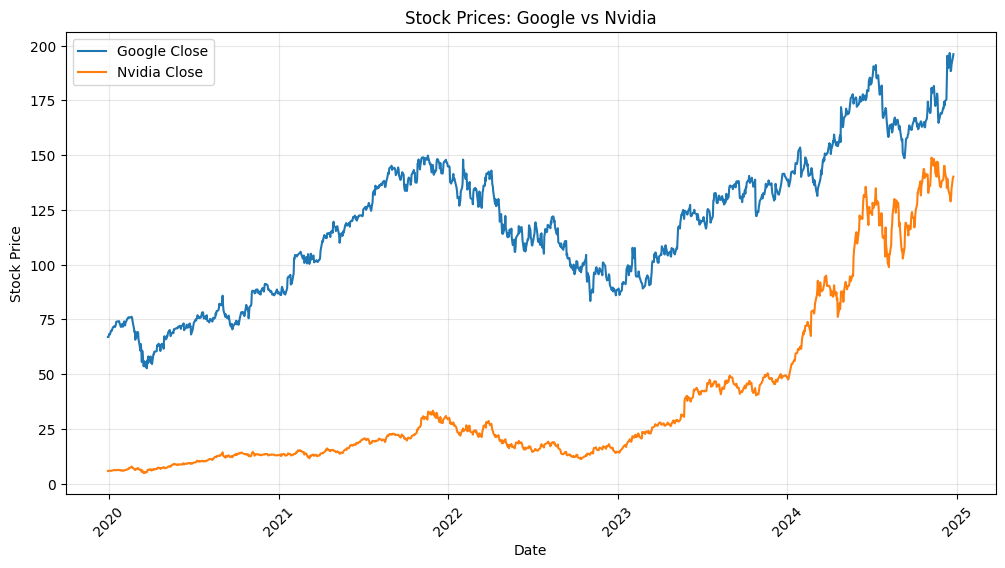

In [214]:
#//Visualization of stock prices evolution

plt.figure(figsize=(12, 6)) #creation of the figure

#plotting close data
plt.plot(combined_data_stock.index, combined_data_stock['Google Close'], label='Google Close')
plt.plot(combined_data_stock.index, combined_data_stock['Nvidia Close'], label='Nvidia Close')

#adding the title, labels and legend
plt.title('Stock Prices: Google vs Nvidia')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

#adding aesthetic details
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

**For these two companies, an upward trend has been observed since 2023. It is therefore relevant to ask which one will reach a 20% return first. On the other hand, this initial visualization shows that the two companies have very different trends. Indeed, Google has a fairly stable evolution that appears periodic, whereas Nvidia's trend resembles an exponential function. Based on this initial analysis, Google's volatility seems lower than Nvidia's, which exhibits larger variations. We will verify this further in the next steps.**

# <font color='#FF8C00'>**2. EVALUATION OF DATA PREDICTABILITY**</font>


# <font color='darkred'>Analysis of the distribution of daily returns</font>

In [215]:
#//Calculation of daily returns and addind of corresponding columns to our dataset
combined_data_stock['Google Daily Return'] = combined_data_stock['Google Close'].pct_change()
combined_data_stock['Nvidia Daily Return'] = combined_data_stock['Nvidia Close'].pct_change()
google_returns = combined_data_stock['Google Daily Return'].dropna()
nvidia_returns = combined_data_stock['Nvidia Daily Return'].dropna()

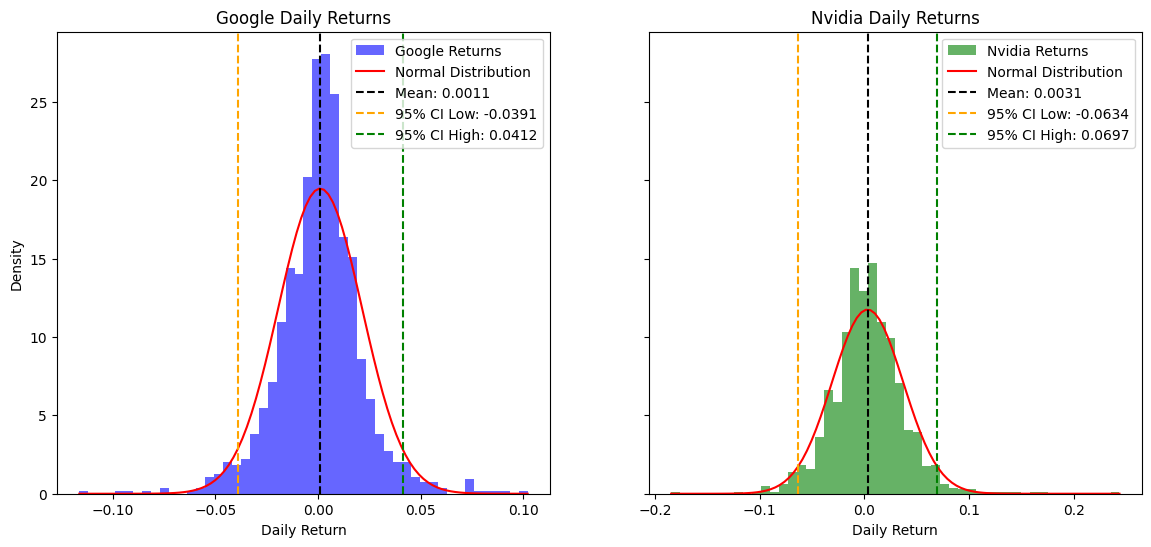

In [216]:
#//Creation of the 2 histograms side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

#Setting of the Google histogram
axes[0].hist(google_returns, bins=50, density=True, alpha=0.6, color='blue', label='Google Returns')
mean_google, std_google = google_returns.mean(), google_returns.std()
x_google = np.linspace(google_returns.min(), google_returns.max(), 100)
axes[0].plot(x_google, norm.pdf(x_google, mean_google, std_google), color='red', label='Normal Distribution')

#calculation and setting of the 95% confidence interval
google_interval_low = mean_google - 1.96 * std_google
google_interval_high = mean_google + 1.96 * std_google
axes[0].axvline(mean_google, color='black', linestyle='dashed', label=f'Mean: {mean_google:.4f}')
axes[0].axvline(google_interval_low, color='orange', linestyle='dashed', label=f'95% CI Low: {google_interval_low:.4f}')
axes[0].axvline(google_interval_high, color='green', linestyle='dashed', label=f'95% CI High: {google_interval_high:.4f}')

axes[0].set_title('Google Daily Returns')
axes[0].set_xlabel('Daily Return')
axes[0].set_ylabel('Density')
axes[0].legend()

#----------------------------------------------

#Setting of the Nvidia histogram
axes[1].hist(nvidia_returns, bins=50, density=True, alpha=0.6, color='green', label='Nvidia Returns')
mean_nvidia, std_nvidia = nvidia_returns.mean(), nvidia_returns.std()
x_nvidia = np.linspace(nvidia_returns.min(), nvidia_returns.max(), 100)
axes[1].plot(x_nvidia, norm.pdf(x_nvidia, mean_nvidia, std_nvidia), color='red', label='Normal Distribution')

#calculation and setting of the 95% confidence interval
nvidia_interval_low = mean_nvidia - 1.96 * std_nvidia
nvidia_interval_high = mean_nvidia + 1.96 * std_nvidia
axes[1].axvline(mean_nvidia, color='black', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_nvidia:.4f}')
axes[1].axvline(nvidia_interval_low, color='orange', linestyle='dashed', label=f'95% CI Low: {nvidia_interval_low:.4f}')
axes[1].axvline(nvidia_interval_high, color='green', linestyle='dashed', label=f'95% CI High: {nvidia_interval_high:.4f}')

axes[1].set_title('Nvidia Daily Returns')
axes[1].set_xlabel('Daily Return')
axes[1].legend()


**The means of Google's and Nvidia's daily returns are approximately zero, and we observe through the standard normal curve that they have a symmetric distribution. This indicates a certain balance between price increases and decreases. Additionally, 95% of the values are concentrated near the center (between -0.06 and 0.07), meaning the distribution is narrow. This is a positive sign, as extreme returns are rare, reflecting limited price variation.**

# <font color='darkred'>Calculation of volatilites</font>

In [217]:
#//Volatility Calculation, since we have seen that is may be an important value

google_returns = google_data['Google Close'].pct_change().dropna()
nvidia_returns = nvidia_data['Nvidia Close'].pct_change().dropna()

google_volatility = google_returns.std()
nvidia_volatility = nvidia_returns.std()

#We will say that there is 252 trading days in a year, source = stockstotrade.com

annualized_google_volatility = google_volatility*(252**0.5)
annualized_nvidia_volatility = nvidia_volatility*(252**0.5)

print(f"Annualized Google Volatility: {annualized_google_volatility * 100} %")
print(f"Annualized Nvidia Volatility: {annualized_nvidia_volatility * 100} %")

Annualized Google Volatility: 32.524788163377686 %
Annualized Nvidia Volatility: 53.904073361954744 %


**Unsurprisingly, Nvidia's volatility is higher than Google's. Therefore, the prediction for Google will be more reliable than the one for Nvidia. Nevertheless, both volatilities are acceptable and allow us to proceed with forecasting with a good chance of success.**

# <font color='darkred'>Analysis of EMAs</font>

#####**There is two types of moving average : SMA (simple moving average) and EMA (exponential moving average). We decided to choose the EMA since it emphasis the most recent data, and since the evolution of nvidia is not linear but more exponential we find that more interessing.**

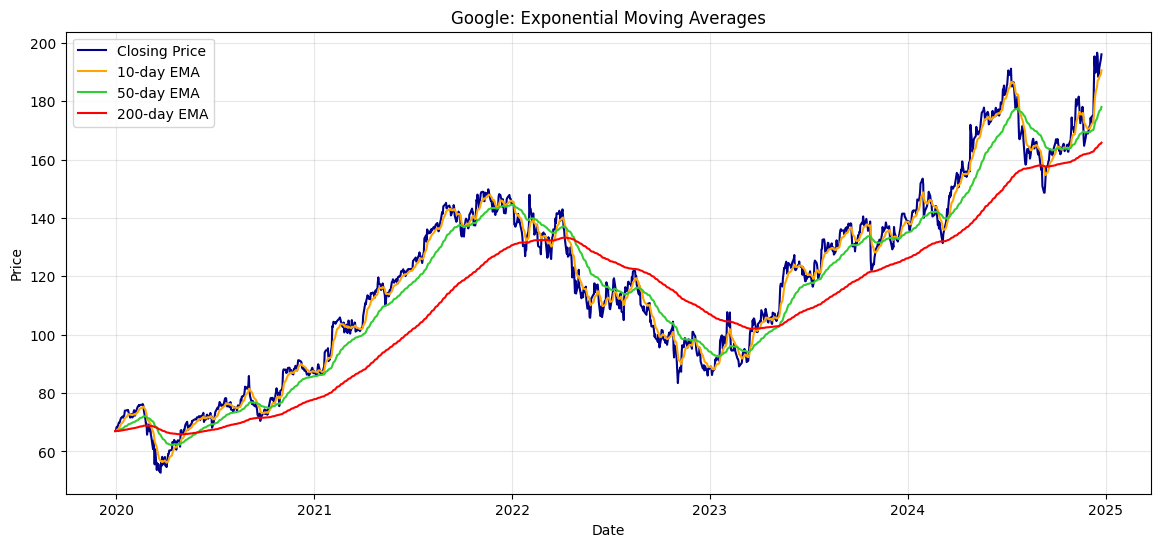

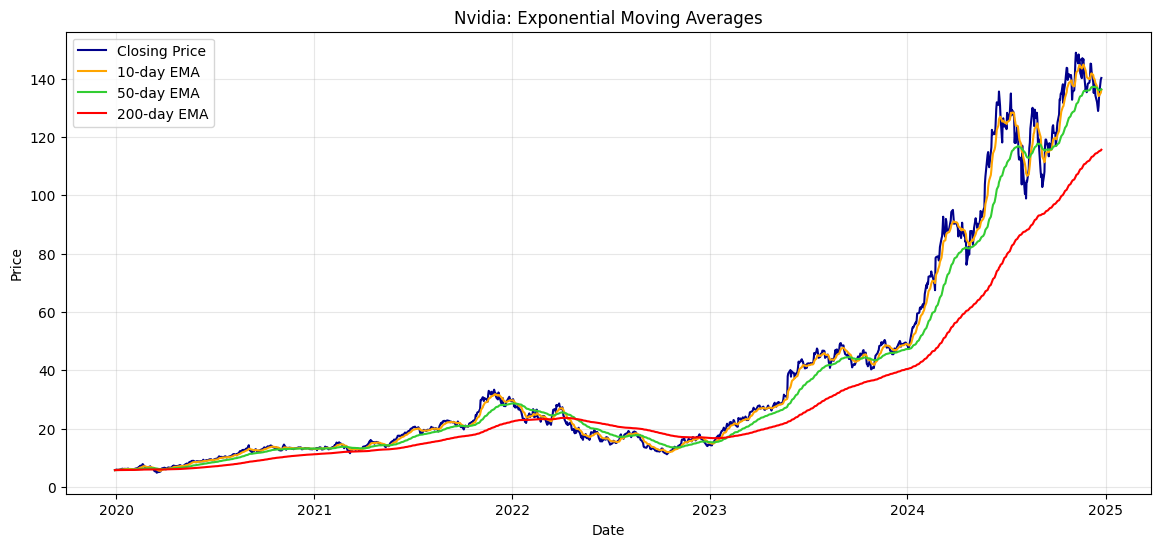

In [218]:
#//Visualization of different EMAs

#calculation of Google EMAs
google_data['10_d_avg'] = google_data['Google Close'].ewm(span=10, adjust=False).mean()
google_data['50_d_avg'] = google_data['Google Close'].ewm(span=50, adjust=False).mean()
google_data['200_d_avg'] = google_data['Google Close'].ewm(span=200, adjust=False).mean()

#calculation of Nvidia EMAs
nvidia_data['10_d_avg'] = nvidia_data['Nvidia Close'].ewm(span=10, adjust=False).mean()
nvidia_data['50_d_avg'] = nvidia_data['Nvidia Close'].ewm(span=50, adjust=False).mean()
nvidia_data['200_d_avg'] = nvidia_data['Nvidia Close'].ewm(span=200, adjust=False).mean()

#Setting and display of the Google graph
plt.figure(figsize=(14, 6))
plt.plot(google_data.index, google_data['Google Close'], label='Closing Price', color='darkblue')
plt.plot(google_data.index, google_data['10_d_avg'], label='10-day EMA', color='orange')
plt.plot(google_data.index, google_data['50_d_avg'], label='50-day EMA', color='limegreen')
plt.plot(google_data.index, google_data['200_d_avg'], label='200-day EMA', color='red')
plt.title('Google: Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(alpha=0.3)

#Setting and display of the Nvidia graph
plt.figure(figsize=(14, 6))
plt.plot(nvidia_data.index, nvidia_data['Nvidia Close'], label='Closing Price', color='darkblue')
plt.plot(nvidia_data.index, nvidia_data['10_d_avg'], label='10-day EMA', color='orange')
plt.plot(nvidia_data.index, nvidia_data['50_d_avg'], label='50-day EMA', color='limegreen')
plt.plot(nvidia_data.index, nvidia_data['200_d_avg'], label='200-day EMA', color='red')
plt.title('Nvidia: Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(alpha=0.3)


**We notice that after a significant crossover between the 50-day EMA and the 200-day EMA in 2023 (indicating a strong upward trend), these two EMAs are farther apart in the case of Nvidia. The slower EMA is therefore less effective in analyzing Nvidia's trends compared to Google's. This justifies the choice of different EMAs to smooth the data of the two companies in the next step.**

# <font color='#FF8C00'>**3. PREPARATION OF THE DATA**</font>


# <font color='darkred'>Assignment of EMAs</font>

#####**Based on the previous analysis, we assign different EMAs to Nvidia and Google. Here, we select the 50-day EMA for Nvidia and a slightly slower EMA for Google, the 100-day EMA.**

In [219]:
#//Moving Average

ema_range_google = 100 #in days
ema_range_nvidia = 50 #in days

google_ema = google_data['Google Close'].ewm(span= ema_range_google, adjust = False).mean()
nvidia_ema = nvidia_data['Nvidia Close'].ewm(span= ema_range_nvidia, adjust = False).mean()

#print(google_ema)
#print(nvidia_ema)

Text(0.5, 1.0, 'Nvidia Stock Price with 50 day EMA')

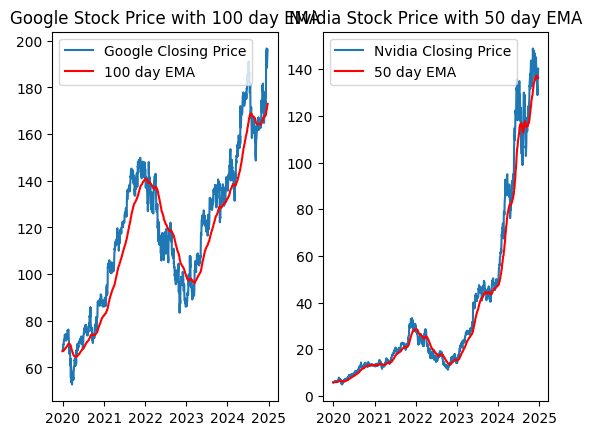

In [220]:
#//Visualization of the EMA
#Google EMA
plt.subplot(1, 2, 1)
plt.plot(google_data['Google Close'], label='Google Closing Price')
plt.plot(google_ema, label=f'{ema_range_google} day EMA', color='red')
plt.legend()
plt.title(f'Google Stock Price with {ema_range_google} day EMA')

#Nvidia EMA
plt.subplot(1, 2, 2)
plt.plot(nvidia_data['Nvidia Close'], label='Nvidia Closing Price')
plt.plot(nvidia_ema, label=f'{ema_range_nvidia} day EMA', color='red')
plt.legend()
plt.title(f'Nvidia Stock Price with {ema_range_nvidia} day EMA')

#####**Since we want to predict whether the stock price goes up or down, we will create a variable price movement : 1 if it goes up / 0 if it goes down.**

A ENLEVER LE TRUC EN DESSOUS ?

In [221]:
#//Preparation of the data

google_data['Price Movement'] = (google_data['Google Close'].shift(-1) > google_data['Google Close']).astype(int)
nvidia_data['Price Movement']=(nvidia_data['Nvidia Close'].shift(-1) > nvidia_data['Nvidia Close']).astype(int)

combined_data_stock = google_data.merge(nvidia_data, left_index=True, right_index=True, suffixes =(' Google', ' Nvidia'))
combined_data_stock = combined_data_stock.dropna()

#Integration of the volatility, the mobing average into combined_data
combined_data_stock['Google Volatility'] = google_returns.rolling(window=50).std()
combined_data_stock['Nvidia Volatility'] = nvidia_returns.rolling(window=50).std()

combined_data_stock['Google 100 days EMA'] = google_ema
combined_data_stock['Nvidia 50 days EMA'] = nvidia_ema

combined_data_stock = combined_data_stock.dropna()
print(combined_data_stock.head(5))

            Google Open  Google Close  Google Volume  10_d_avg Google  \
Date                                                                    
2020-03-12    56.131001     55.577499       94326000        63.477062   
2020-03-13    58.749500     60.713501       79400000        62.974597   
2020-03-16    54.480499     53.650002       96520000        61.279216   
2020-03-17    54.532001     55.903000       83194000        60.301722   
2020-03-18    52.997002     54.559502       93044000        59.257682   

            50_d_avg Google  200_d_avg Google  Price Movement Google  \
Date                                                                   
2020-03-12        69.051296         68.383751                      1   
2020-03-13        68.724324         68.307430                      0   
2020-03-16        68.133174         68.161585                      1   
2020-03-17        67.653559         68.039609                      0   
2020-03-18        67.140067         67.905478           

# <font color='darkred'>Analysis of the Correlation Matrix</font>

#####**Before doing a Decision Tree, we need to know the correlation between Nvidia data and Google data. If the correlation is high, we will use Nvidia data to predict Google, and vice versa.**

Text(0.5, 1.0, 'Correlation Matrix between Google and Nvidia Features')

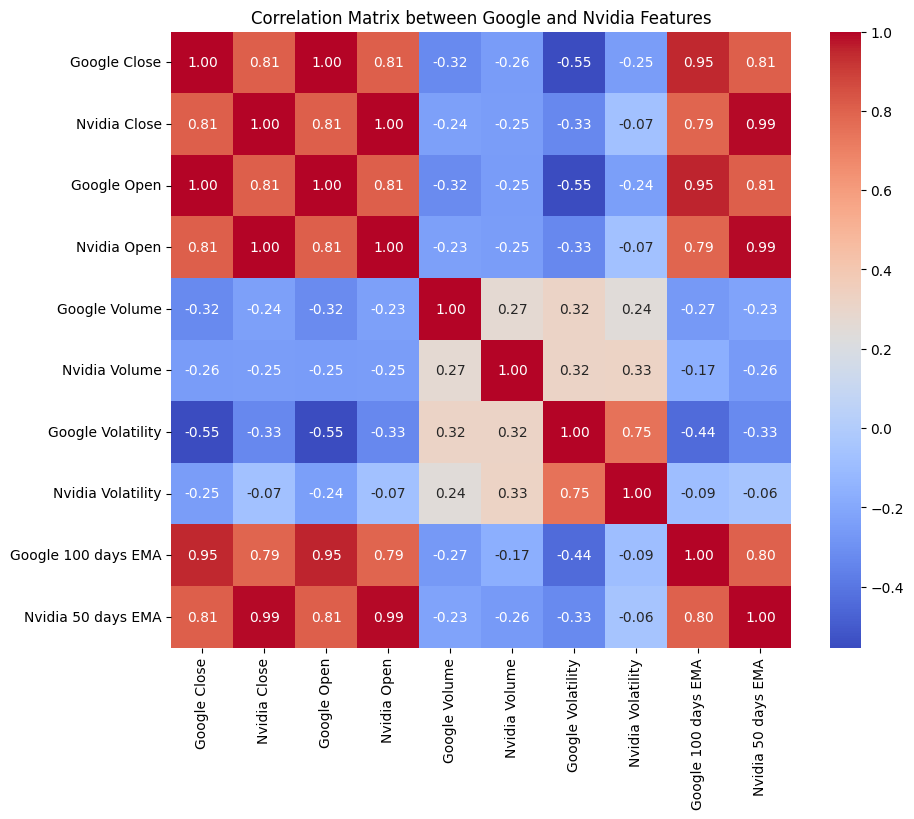

In [222]:
#//Correlation Matrix

correlation_colums = ['Google Close', 'Nvidia Close', 'Google Open', 'Nvidia Open', 'Google Volume', 'Nvidia Volume', 'Google Volatility', 'Nvidia Volatility', 'Google 100 days EMA', 'Nvidia 50 days EMA']
correlation_matrix = combined_data_stock[correlation_colums].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix between Google and Nvidia Features")

####This correlation matrix provides essential information for our future modeling choices:


*   **Google Close and Nvidia Close - Correlation 0.81**: Strong correlation between the two stock prices, indicating a relationship to exploit. We can use Google Close as an exogenous variable to predict Nvidia Close, and vice versa.
*   **Google 100-day EMA and Nvidia 50-day EMA - Correlation 0.80**: High correlation between the EMAs of the two stocks, indicating that their trends are often aligned, reinforcing their shared market behavior.
*   **Close and Volume - Correlation -0.32 and -0.25**: We notice that the trading volume and the closing price of the stocks are weakly correlated. Therefore, we know that it is not relevant to use the volume as an explanatory variable.





# <font color='darkred'>Analysis of the Seasonality</font>


###**For Google**

<Figure size 640x480 with 0 Axes>

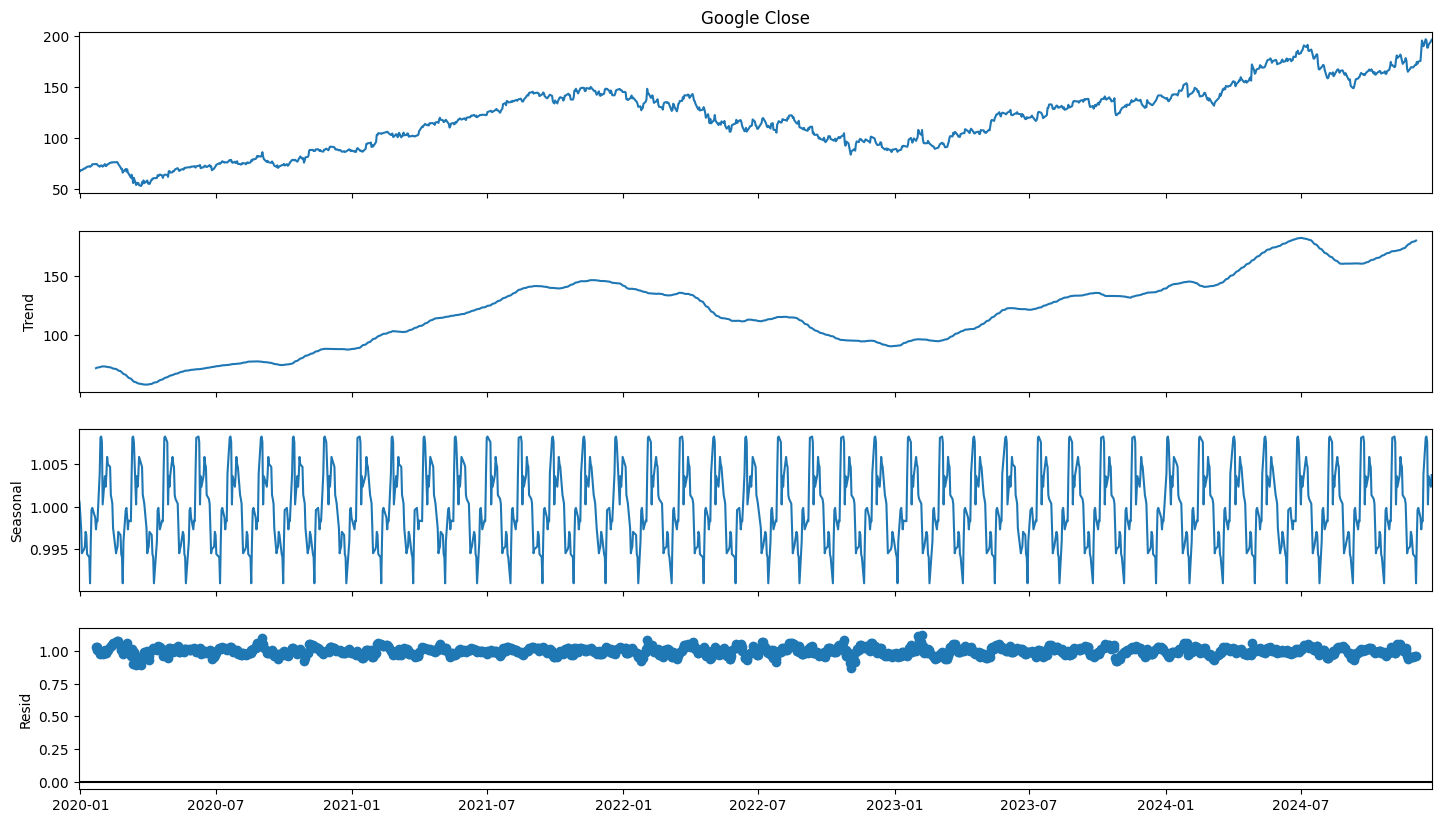

In [223]:
result = seasonal_decompose(google_data['Google Close'], model='multiplicative', period=30)

# Visualisation des composants
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)
plt.show()

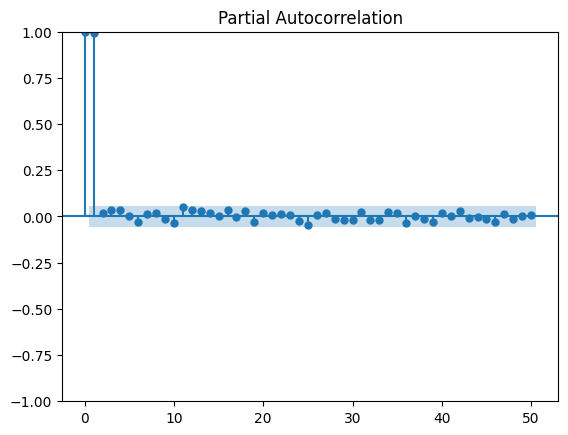

In [224]:
data=pd.to_datetime(google_data['Google Close'])
plot_pacf(data, lags=50)
plt.show()

###**For Nvidia**

<Figure size 640x480 with 0 Axes>

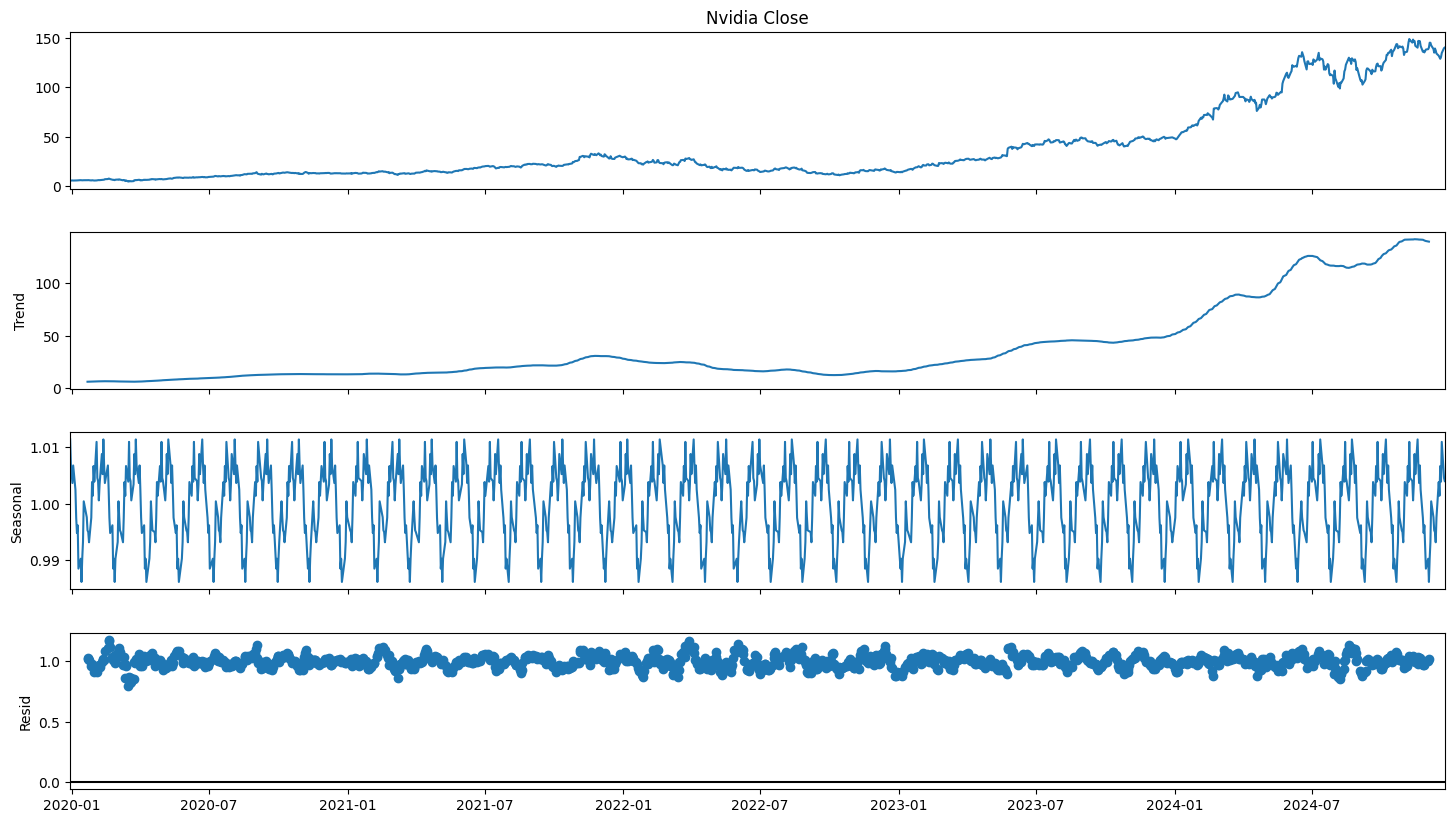

In [225]:
result = seasonal_decompose(nvidia_data['Nvidia Close'], model='multiplicative', period=30)

# Visualisation des composants
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)
plt.show()

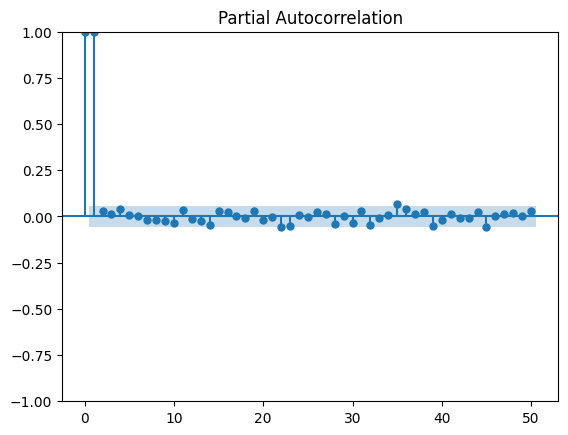

In [226]:
data=pd.to_datetime(nvidia_data['Nvidia Close'])
plot_pacf(data, lags=50)
plt.show()

**We observe in this seasonal decomposition that our data is not stationary due to the "Trend" components. Additionally, we notice clear and regular periodic patterns in the "Seasonal" components, indicating that our data is seasonal. It is important to know these two pieces of information to select appropriate algorithms later on.**

# <font color='#FF8C00'>**4. APPLICATION OF CLASSICAL PREDICTION ALGORITHMS**</font>


# <font color='darkred'>DecisionTreeClassifier</font>


In [227]:
#//Decision Tree using DecisionTreeClassifier

features = ['Google 100 days EMA', 'Nvidia 50 days EMA', 'Google Volatility', 'Nvidia Volatility']
X = combined_data_stock[features]
y_google = combined_data_stock['Price Movement Google']
y_nvidia = combined_data_stock['Price Movement Nvidia']

#So now we are spliting our data into training and testing sets
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X,y_google, test_size = 0.3, random_state = 42)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X,y_nvidia, test_size = 0.3, random_state = 42 )


model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train_g, y_train_g)
model.fit(X_train_n, y_train_n)

y_pred_g = model.predict(X_test_g)
y_pred_n = model.predict(X_test_n)
print(f"Decision Tree Accuracy with Google price movement : {accuracy_score(y_test_g, y_pred_g):.4f}")
print(f"Decision Tree Accuracy with Nvidia price movement : {accuracy_score(y_test_n, y_pred_n):.4f}")

Decision Tree Accuracy with Google price movement : 0.5304
Decision Tree Accuracy with Nvidia price movement : 0.5110


#####**Our results mean that our model was able to predict correctly the movement of nvidia price at 51% and google's one at 53%. So our model is not the best. What about testing a new one ? We can also improve this one by adding more features.**

# <font color='darkred'>Logistic Regression</font>


In [228]:
#//Logistic Regression using sklearn

model = LogisticRegression()
model.fit(X_train_g, y_train_g)
model.fit(X_train_n, y_train_n)

y_pred_g = model.predict(X_test_g)
y_pred_n = model.predict(X_test_n)
print(f"Logistic Regression Accuracy with Google price movement : {accuracy_score(y_test_g, y_pred_g):.4f}")
print(f"Logistic Regression Accuracy with Nvidia price movement : {accuracy_score(y_test_n, y_pred_n):.4f}")

Logistic Regression Accuracy with Google price movement : 0.5663
Logistic Regression Accuracy with Nvidia price movement : 0.5359


#####**We can see that our results are slightly better, (58% with Google and 55% with Nvidia), we will need to improve it.**


# <font color='darkred'>Support Vector Machine</font>

In [131]:
#//Support Vector Machine using sklearn

model = SVC(kernel='rbf', random_state=42)
model.fit(X_train_g, y_train_g)
model.fit(X_train_n, y_train_n)

y_pred_g = model.predict(X_test_g)
y_pred_n = model.predict(X_test_n)
print(f"SVM Accuracy with Google price movement : {accuracy_score(y_test_g, y_pred_g):.4f}")
print(f"SVM Regression Accuracy with Nvidia price movement : {accuracy_score(y_test_n, y_pred_n):.4f}")

SVM Accuracy with Google price movement : 0.5663
SVM Regression Accuracy with Nvidia price movement : 0.5359


#####**Our results are still slightly better (58% for Google and 55% with Nvidia).**

# <font color='darkred'>Random Forest</font>

In [132]:
#//Random Forest using sklearn

model = RandomForestClassifier(n_estimators=100, random_state=42)

#training of the model on Google
model.fit(X_train_g, y_train_g)
y_pred_g = model.predict(X_test_g)
accuracy_g = accuracy_score(y_test_g, y_pred_g)

#training of the model on Nvidia
model.fit(X_train_n, y_train_n)
y_pred_n = model.predict(X_test_n)
accuracy_n = accuracy_score(y_test_n, y_pred_n)

#display
print(f"Random Forest Accuracy with Google price movement: {accuracy_g:.4f}")
print(f"Random Forest Accuracy with Nvidia price movement: {accuracy_n:.4f}")

Random Forest Accuracy with Google price movement: 0.5083
Random Forest Accuracy with Nvidia price movement: 0.5110


#####**We observe that Random Forest is the less adapted model for our data.**

# <font color='darkred'>LSTM</font>

###**LSTM for Google**

X_train.shape: (944, 60, 2)
y_train.shape: (944, 1)
X_test.shape: (252, 60, 2)
y_test.shape: (252, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 1.2190 - val_loss: 0.8745
Epoch 2/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.8128 - val_loss: 0.6273
Epoch 3/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.5760 - val_loss: 0.4543
Epoch 4/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.4122 - val_loss: 0.3196
Epoch 5/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.2973 - val_loss: 0.2333
Epoch 6/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.2175 - val_loss: 0.1756
Epoch 7/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.1626 - val_loss: 0.1328
Epoch 8/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.1230 - val_loss: 0.0982
Epoch 9/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0963 - val_loss: 0.0766
Epoch 10/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0769 - val_loss: 0.0599
Epoch 11/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0617 - val_loss: 0.0530
Epoch 12/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0

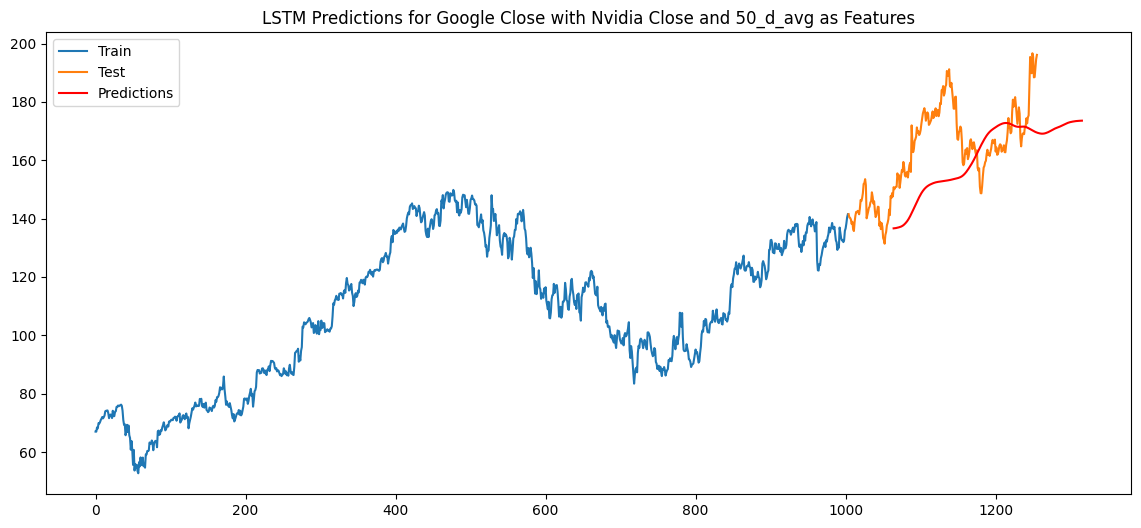

In [230]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Paramètres
sequence_length = 60

# Récupération des colonnes pertinentes pour les variables explicatives et la cible
features = ['Nvidia Close', '50_d_avg']  # Variables explicatives (Nvidia Close remplace Google Volume)
target = 'Google Close'  # Variable cible

# Préparation des données
nvidia_close = nvidia_data['Nvidia Close'].values.reshape(-1, 1)  # Récupérer les données de Nvidia Close
google_data['Nvidia Close'] = nvidia_close[:len(google_data)]  # Ajouter Nvidia Close dans google_data

google_data_features = google_data[features].values
google_data_target = google_data[target].values

# Séparation en données d'entraînement et de test
train_size = int(len(google_data) * 0.8)
train_features = google_data_features[:train_size]
test_features = google_data_features[train_size:]
train_target = google_data_target[:train_size]
test_target = google_data_target[train_size:]

# Normalisation des données
scalers = {}
scaled_train_features = {}
scaled_test_features = {}

# Normaliser les variables explicatives
for i, feature in enumerate(features):
    scalers[feature] = MinMaxScaler((0, 1))
    scaled_train_features[feature] = scalers[feature].fit_transform(train_features[:, i].reshape(-1, 1))
    scaled_test_features[feature] = scalers[feature].transform(test_features[:, i].reshape(-1, 1))

# Normalisation de la variable cible
scaler_target = MinMaxScaler((0, 1))
scaled_train_target = scaler_target.fit_transform(train_target.reshape(-1, 1))
scaled_test_target = scaler_target.transform(test_target.reshape(-1, 1))

# Combiner les variables explicatives normalisées
train_scaled = np.hstack([scaled_train_features[feature] for feature in features])
test_scaled = np.hstack([scaled_test_features[feature] for feature in features])

# Fonction pour créer les séquences
def create_sequences_multivariate(features, target, length):
    X, y = [], []
    for i in range(length, len(features)):
        X.append(features[i-length:i, :])  # Inclure les variables explicatives dans la séquence
        y.append(target[i])  # Inclure la cible correspondante
    return np.array(X), np.array(y)

# Vérification des dimensions avant de concaténer les données
combined_scaled = np.vstack((train_scaled[-sequence_length:], test_scaled))
combined_target = np.vstack((scaled_train_target[-sequence_length:], scaled_test_target))

# Création des séquences
X_train, y_train = create_sequences_multivariate(train_scaled, scaled_train_target, sequence_length)
X_test, y_test = create_sequences_multivariate(combined_scaled, combined_target, sequence_length)

# Vérification des dimensions des séquences
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")

# Modèle LSTM avec régularisation et Early Stopping
model_lstm = Sequential([
    # Première couche LSTM avec régularisation L2
    LSTM(50,
         return_sequences=True,
         input_shape=(X_train.shape[1], X_train.shape[2]),
         kernel_regularizer=l2(0.01)),
    Dropout(0.2),  # Dropout pour éviter l'overfitting
    # Deuxième couche LSTM avec régularisation L2
    LSTM(50,
         return_sequences=False,
         kernel_regularizer=l2(0.01)),
    Dropout(0.2),  # Dropout
    # Couche Dense avec régularisation L2
    Dense(25, kernel_regularizer=l2(0.01)),
    Dense(1)  # Couche de sortie
])

# Compilation du modèle
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Configuration de l'Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraînement du modèle avec Early Stopping
model_lstm.fit(
    X_train, y_train,
    epochs=40,  # Augmentation du nombre d'époques pour permettre Early Stopping
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Prédictions
predictions = scaler_target.inverse_transform(
    model_lstm.predict(X_test).reshape(-1, 1)
)
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1, 1))

# Évaluation des performances
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
accuracy = 100 - mape

mse = mean_squared_error(y_test_actual, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, predictions)
r2 = r2_score(y_test_actual, predictions)

print(f"Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

# Visualisation des résultats
plt.figure(figsize=(14, 6))

# Cible d'entraînement
plt.plot(train_target, label='Train')

# Cible de test
plt.plot(range(train_size, len(google_data)), test_target, label='Test')

# Prédictions (alignement des indices)
start_idx = train_size + sequence_length  # Les prédictions commencent après les séquences de train
plt.plot(range(start_idx, start_idx + len(predictions)), predictions, c='red', label='Predictions')

plt.legend()
plt.title("LSTM Predictions for Google Close with Nvidia Close and 50_d_avg as Features")
plt.show()


#####**The LSTM is a highly suitable algorithm for our problem as it accounts for the temporal dependencies present in the time series. Here, we achieve correct results for forecasting Google.**

###**LSTM for Nvidia**

train_scaled.shape: (1004, 2)
test_scaled.shape: (252, 2)
scaled_train_target.shape: (1004, 1)
scaled_test_target.shape: (252, 1)
X_train.shape: (944, 60, 2)
y_train.shape: (944, 1)
X_test.shape: (252, 60, 2)
y_test.shape: (252, 1)
Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - loss: 1.0966 - val_loss: 0.9576
Epoch 2/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.7363 - val_loss: 0.6935
Epoch 3/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.4917 - val_loss: 0.5162
Epoch 4/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.3281 - val_loss: 0.3559
Epoch 5/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.2200 - val_loss: 0.3155
Epoch 6/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.1483 - val_loss: 0.2122
Epoch 7/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.1028 - val_loss: 0.2150
Epoch 8/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0715 - val_loss: 0.1484
Epoch 9/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0528 - val_loss: 0.2066
Epoch 10/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0390 - val_loss: 0.1951
Epoch 11/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0291 - val_loss: 0.1740
Epoch 12/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0227 - val_

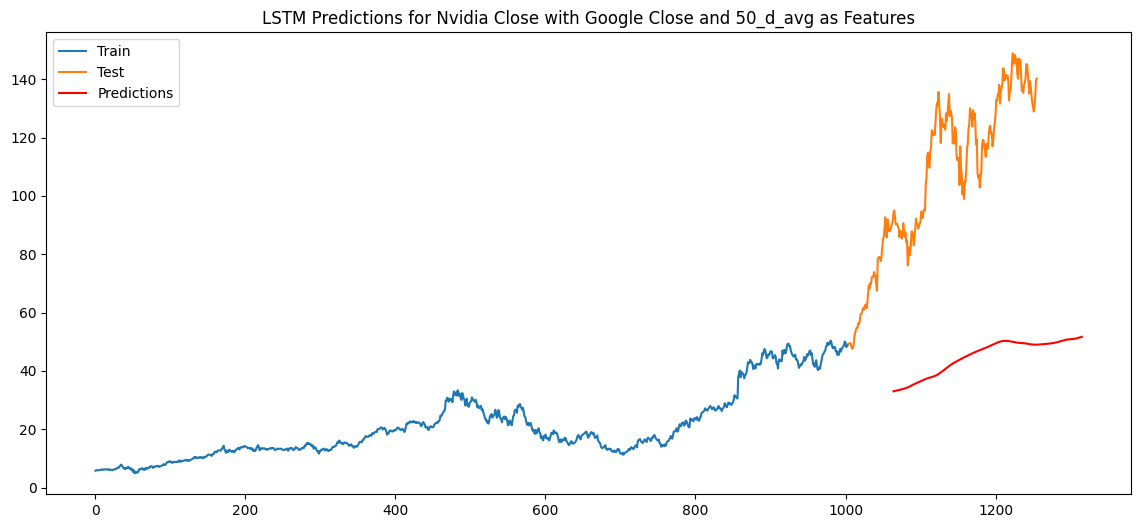

In [231]:
# Paramètres
sequence_length = 60

# Récupération des colonnes pertinentes pour les variables explicatives et la cible
features = ['Google Close', '50_d_avg']  # Variables explicatives (Google Close remplace Nvidia Volume)
target = 'Nvidia Close'  # Variable cible

# Préparation des données
google_close = google_data['Google Close'].values.reshape(-1, 1)  # Récupérer les données de Google Close
nvidia_data['Google Close'] = google_close[:len(nvidia_data)]  # Ajouter Google Close dans nvidia_data

nvidia_data_features = nvidia_data[features].values
nvidia_data_target = nvidia_data[target].values

# Séparation en données d'entraînement et de test
train_size = int(len(nvidia_data) * 0.8)
train_features = nvidia_data_features[:train_size]
test_features = nvidia_data_features[train_size:]
train_target = nvidia_data_target[:train_size]
test_target = nvidia_data_target[train_size:]

# Normalisation des données
scalers = {}
scaled_train_features = {}
scaled_test_features = {}

# Normaliser les variables explicatives
for i, feature in enumerate(features):
    scalers[feature] = MinMaxScaler((0, 1))
    scaled_train_features[feature] = scalers[feature].fit_transform(train_features[:, i].reshape(-1, 1))
    scaled_test_features[feature] = scalers[feature].transform(test_features[:, i].reshape(-1, 1))

# Normalisation de la variable cible
scaler_target = MinMaxScaler((0, 1))
scaled_train_target = scaler_target.fit_transform(train_target.reshape(-1, 1))
scaled_test_target = scaler_target.transform(test_target.reshape(-1, 1))

# Combiner les variables explicatives normalisées
train_scaled = np.hstack([scaled_train_features[feature] for feature in features])
test_scaled = np.hstack([scaled_test_features[feature] for feature in features])

# Fonction pour créer les séquences
def create_sequences_multivariate(features, target, length):
    X, y = [], []
    for i in range(length, len(features)):
        X.append(features[i-length:i, :])  # Inclure les variables explicatives dans la séquence
        y.append(target[i])  # Inclure la cible correspondante
    return np.array(X), np.array(y)

# Vérification des dimensions avant de concaténer les données
print(f"train_scaled.shape: {train_scaled.shape}")
print(f"test_scaled.shape: {test_scaled.shape}")
print(f"scaled_train_target.shape: {scaled_train_target.shape}")
print(f"scaled_test_target.shape: {scaled_test_target.shape}")

# Concatenation des données pour éviter les problèmes d'indexation
combined_scaled = np.vstack((train_scaled[-sequence_length:], test_scaled))
combined_target = np.vstack((scaled_train_target[-sequence_length:], scaled_test_target))

# Création des séquences
X_train, y_train = create_sequences_multivariate(train_scaled, scaled_train_target, sequence_length)
X_test, y_test = create_sequences_multivariate(combined_scaled, combined_target, sequence_length)

# Vérification des dimensions des séquences
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")

# Modèle LSTM avec régularisation et Early Stopping
model_lstm = Sequential([
    # Première couche LSTM avec régularisation L2
    LSTM(50,
         return_sequences=True,
         input_shape=(X_train.shape[1], X_train.shape[2]),
         kernel_regularizer=l2(0.01)),
    Dropout(0.2),  # Dropout pour éviter l'overfitting
    # Deuxième couche LSTM avec régularisation L2
    LSTM(50,
         return_sequences=False,
         kernel_regularizer=l2(0.01)),
    Dropout(0.2),  # Dropout
    # Couche Dense avec régularisation L2
    Dense(25, kernel_regularizer=l2(0.01)),
    Dense(1)  # Couche de sortie
])

# Compilation du modèle
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Configuration de l'Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraînement du modèle avec Early Stopping
model_lstm.fit(
    X_train, y_train,
    epochs=40,  # Augmentation du nombre d'époques pour permettre Early Stopping
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Prédictions
predictions = scaler_target.inverse_transform(
    model_lstm.predict(X_test).reshape(-1, 1)
)
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1, 1))

# Évaluation des performances
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
accuracy = 100 - mape

mse = mean_squared_error(y_test_actual, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, predictions)
r2 = r2_score(y_test_actual, predictions)

print(f"Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

# Visualisation des résultats
plt.figure(figsize=(14, 6))

# Cible d'entraînement
plt.plot(train_target, label='Train')

# Cible de test
plt.plot(range(train_size, len(nvidia_data)), test_target, label='Test')

# Prédictions (alignement des indices)
start_idx = train_size + sequence_length  # Les prédictions commencent après les séquences de train
plt.plot(range(start_idx, start_idx + len(predictions)), predictions, c='red', label='Predictions')

plt.legend()
plt.title("LSTM Predictions for Nvidia Close with Google Close and 50_d_avg as Features")
plt.show()


#####**In the case of Nvidia, we observe that the predictions deviate more from the actual values. We will study how to improve the results later. It might be necessary to choose a more suitable EMA or add macroeconomic data.**

# **<font color='lightgreen'>STAGE 2</font>**

In this stage of the project, we are going to test SARIMAX and Prophet in order to compare them to LSTM. We will use the model with the best results for our forecasting.

# **<font color='darkred'>SARIMAX</font>**

###**SARIMAX for Google**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                       Google Close   No. Observations:                 1004
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1953.206
Date:                            Thu, 26 Dec 2024   AIC                           3920.412
Time:                                    17:38:22   BIC                           3954.603
Sample:                                         0   HQIC                          3933.422
                                           - 1004                                         
Covariance Type:                              opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Nvidia Close     1.5559      0.039     39.780      0.000       1.479       1.633
50_d_avg         2.7334      

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


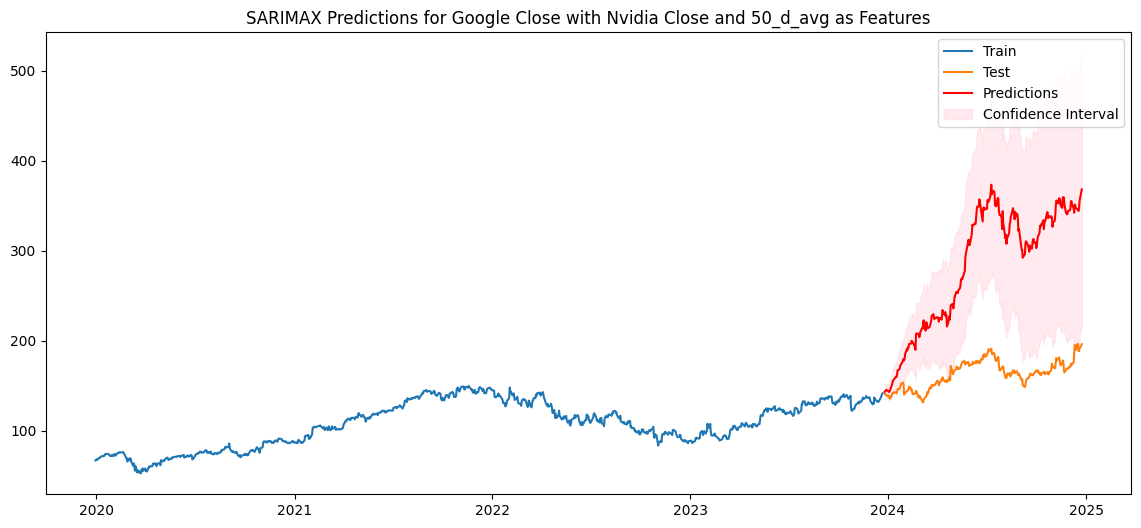

In [232]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Préparation des données pour SARIMAX
train_size = int(len(google_data) * 0.8)
target = 'Google Close'
features = ['Nvidia Close', '50_d_avg']

google_data['Nvidia Close'] = nvidia_data['Nvidia Close'][:len(google_data)]  # Ajouter Nvidia Close depuis nvidia_data

train_target = google_data[target][:train_size]
test_target = google_data[target][train_size:]

# Variables exogènes
train_exog = google_data[features][:train_size]
test_exog = google_data[features][train_size:]

# Vérification de la stationnarité et différenciation (le cas échéant)
# Les données sont légèrement saisonnières et non stationnaires, une différenciation saisonnière est utilisée
order = (1, 1, 1)  # ARIMA(p, d, q)
seasonal_order = (1, 1, 1, 12)  # Saisonnière : (P, D, Q, s)

# Entraînement du modèle SARIMAX
model_sarimax = SARIMAX(train_target, exog=train_exog, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = model_sarimax.fit(disp=False)

# Résumé du modèle
print(results.summary())

# Prédictions
forecast_steps = len(test_target)
forecast = results.get_forecast(steps=forecast_steps, exog=test_exog)
predictions = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Alignement des indices avec les données de test
dates_test = google_data.index[train_size:]
predictions.index = dates_test
confidence_intervals.index = dates_test

# Évaluation des performances
mse = mean_squared_error(test_target, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_target, predictions)
r2 = r2_score(test_target, predictions)

print(f"Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")
mape = np.mean(np.abs((test_target - predictions) / test_target)) * 100
accuracy = 100 - mape
print(f"Accuracy: {accuracy:.2f}%")

# Visualisation des résultats
plt.figure(figsize=(14, 6))

# Train data
plt.plot(google_data.index[:train_size], google_data[target][:train_size], label='Train')

# Test data
plt.plot(google_data.index[train_size:], google_data[target][train_size:], label='Test')

# Predictions
plt.plot(predictions.index, predictions, color='red', label='Predictions')

# Confiance intervals
plt.fill_between(predictions.index,
                 confidence_intervals.iloc[:, 0],  # Lower bound
                 confidence_intervals.iloc[:, 1],  # Upper bound
                 color='pink', alpha=0.3, label='Confidence Interval')

plt.legend()
plt.title("SARIMAX Predictions for Google Close with Nvidia Close and 50_d_avg as Features")
plt.show()


###**SARIMAX for Nvidia**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                       Nvidia Close   No. Observations:                 1004
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -897.145
Date:                            Thu, 26 Dec 2024   AIC                           1808.291
Time:                                    17:41:15   BIC                           1842.482
Sample:                                         0   HQIC                          1821.301
                                           - 1004                                         
Covariance Type:                              opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Google Close     0.1797      0.008     22.403      0.000       0.164       0.195
50_d_avg         1.5727      

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


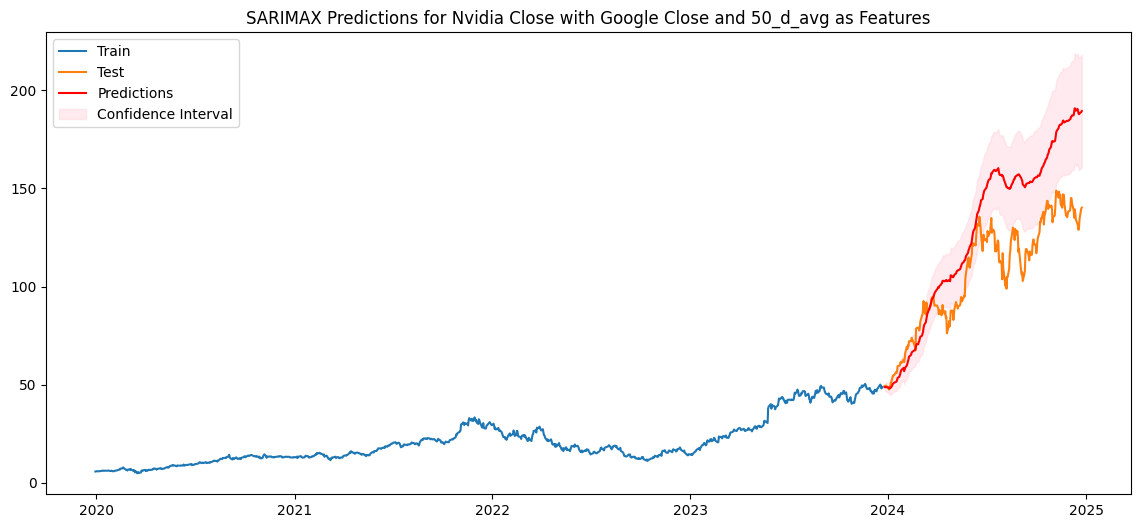

In [237]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

features = ['Google Close', '50_d_avg']  # Variables explicatives (Google Close remplace Nvidia Volume)
target = 'Nvidia Close'  # Variable cible
# Préparation des données pour SARIMAX
train_size = int(len(nvidia_data) * 0.8)
train_target = nvidia_data[target][:train_size]
test_target = nvidia_data[target][train_size:]

# Variables exogènes
train_exog = nvidia_data[features][:train_size]
test_exog = nvidia_data[features][train_size:]

# Vérification de la stationnarité et différenciation (le cas échéant)
# Les données sont légèrement saisonnières et non stationnaires, une différenciation saisonnière est utilisée
order = (1, 1, 1)  # ARIMA(p, d, q)
seasonal_order = (1, 1, 1, 12)  # Saisonnière : (P, D, Q, s)

# Entraînement du modèle SARIMAX
model_sarimax = SARIMAX(train_target, exog=train_exog, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = model_sarimax.fit(disp=False)

# Résumé du modèle
print(results.summary())

# Prédictions
forecast_steps = len(test_target)
forecast = results.get_forecast(steps=forecast_steps, exog=test_exog)
predictions = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Alignement des indices avec les données de test
dates_test = nvidia_data.index[train_size:]
predictions.index = dates_test
confidence_intervals.index = dates_test

# Évaluation des performances
mse = mean_squared_error(test_target, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_target, predictions)
r2 = r2_score(test_target, predictions)

print(f"Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")
mape = np.mean(np.abs((test_target - predictions) / test_target)) * 100
accuracy = 100 - mape
print(f"Accuracy: {accuracy:.2f}%")

# Visualisation des résultats
plt.figure(figsize=(14, 6))

# Train data
plt.plot(nvidia_data.index[:train_size], nvidia_data[target][:train_size], label='Train')

# Test data
plt.plot(nvidia_data.index[train_size:], nvidia_data[target][train_size:], label='Test')

# Predictions
plt.plot(predictions.index, predictions, color='red', label='Predictions')

# Confiance intervals
plt.fill_between(predictions.index,
                 confidence_intervals.iloc[:, 0],  # Lower bound
                 confidence_intervals.iloc[:, 1],  # Upper bound
                 color='pink', alpha=0.3, label='Confidence Interval')

plt.legend()
plt.title("SARIMAX Predictions for Nvidia Close with Google Close and 50_d_avg as Features")
plt.show()


**We notice that the prediction of Nvidia's actions is better with SARIMAX than with LSTM. However, in the case of Google it is quite the opposite, the MSE goes from 110 with LSTM to 17500 with SARIMAX.**

# **<font color='darkred'>Prophet</font>**

###**Prophet for Google**


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1iz4uxzh/lq4uwonr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1iz4uxzh/ex8yy8af.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68462', 'data', 'file=/tmp/tmp1iz4uxzh/lq4uwonr.json', 'init=/tmp/tmp1iz4uxzh/ex8yy8af.json', 'output', 'file=/tmp/tmp1iz4uxzh/prophet_modeljwyxgk68/prophet_model-20241226174023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:40:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:40:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics:
Mean Squared Error (MSE): 151.5516
Root Mean Squared Error (RMSE): 12.3106
Mean Absolute Error (MAE): 10.3036
R-squared (R²): 0.3435
Mean Absolute Percentage Error (MAPE): 6.12%
Accuracy: 93.88%


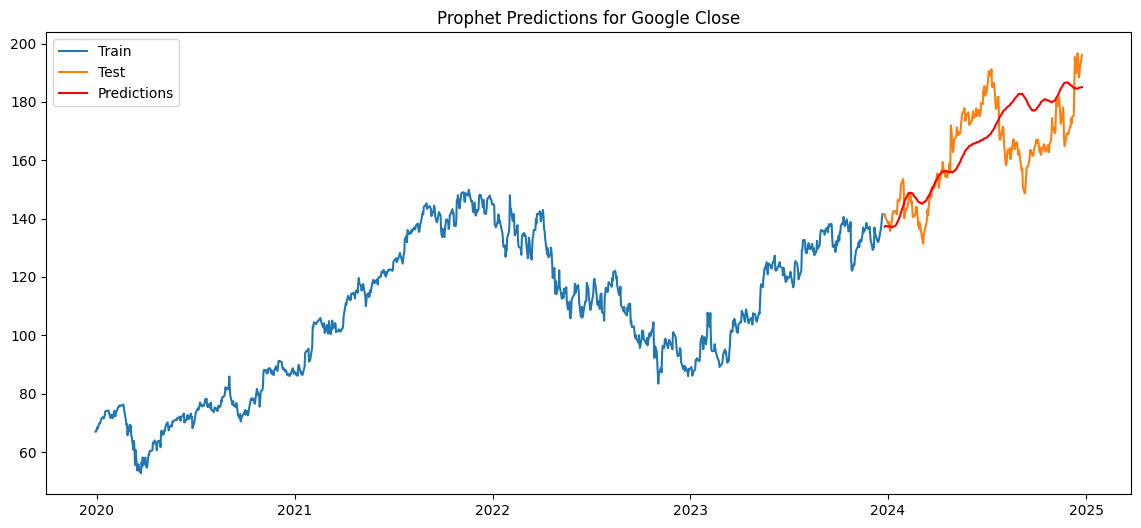

In [236]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

target = 'Google Close'
features = ['Nvidia Close', '50_d_avg']
# Préparation des données pour Prophet
data = google_data.reset_index()[['Date', target]]
data.columns = ['ds', 'y']  # Renommer les colonnes selon les exigences de Prophet

# Séparer les données en train et test
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Initialiser et entraîner le modèle
model = Prophet()
model.fit(train_data)

# Faire des prédictions sur une période étendue pour inclure toutes les dates jusqu'en 2025
future = model.make_future_dataframe(periods=(test_data['ds'].max() - train_data['ds'].max()).days + 1, freq='D')
forecast = model.predict(future)

# Extraire les prédictions correspondant aux données de test
predictions = forecast[forecast['ds'].isin(test_data['ds'])][['ds', 'yhat']]

# Évaluer les performances
mse = mean_squared_error(test_data['y'], predictions['yhat'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['y'], predictions['yhat'])
r2 = r2_score(test_data['y'], predictions['yhat'])
mape = np.mean(np.abs((test_data['y'] - predictions['yhat']) / test_data['y'])) * 100
accuracy = 100 - mape

print(f"Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

# Visualisation des résultats
plt.figure(figsize=(14, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train')
plt.plot(test_data['ds'], test_data['y'], label='Test')
plt.plot(predictions['ds'], predictions['yhat'], color='red', label='Predictions')
plt.legend()
plt.title("Prophet Predictions for Google Close")
plt.show()


###**Prophet for Nvidia**


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1iz4uxzh/xzyp477k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1iz4uxzh/2wkgc0gq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4367', 'data', 'file=/tmp/tmp1iz4uxzh/xzyp477k.json', 'init=/tmp/tmp1iz4uxzh/2wkgc0gq.json', 'output', 'file=/tmp/tmp1iz4uxzh/prophet_modelfwk22_ke/prophet_model-20241226174129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:41:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:41:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics:
Mean Squared Error (MSE): 1743.1928
Root Mean Squared Error (RMSE): 41.7516
Mean Absolute Error (MAE): 37.7247
R-squared (R²): -1.2869
Mean Absolute Percentage Error (MAPE): 38.31%
Accuracy: 61.69%


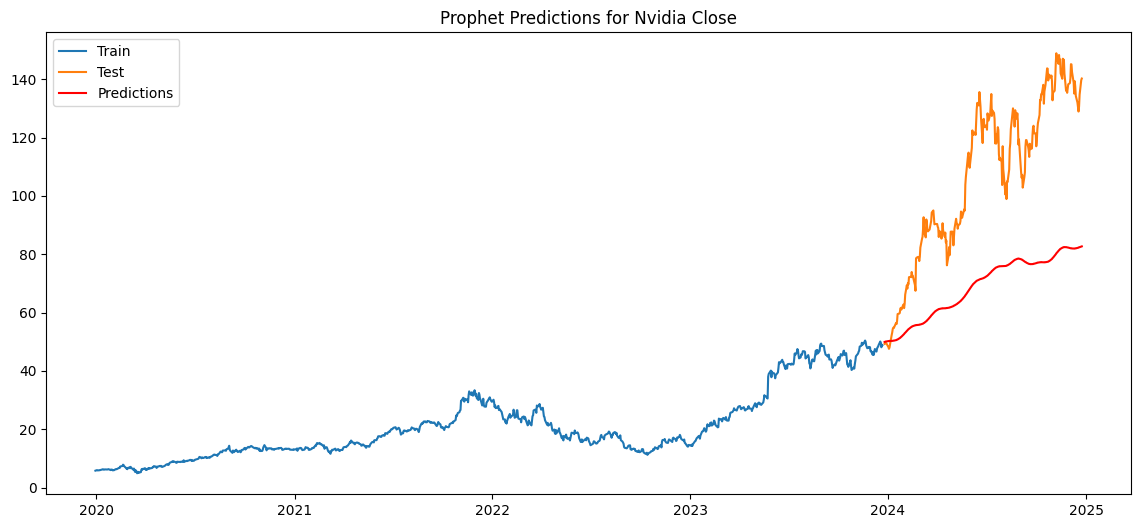

In [238]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

features = ['Google Close', '50_d_avg']  # Variables explicatives (Google Close remplace Nvidia Volume)
target = 'Nvidia Close'  # Variable cible
# Préparation des données pour Prophet
data = nvidia_data.reset_index()[['Date', target]]
data.columns = ['ds', 'y']  # Renommer les colonnes selon les exigences de Prophet

# Séparer les données en train et test
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Initialiser et entraîner le modèle
model = Prophet()
model.fit(train_data)

# Faire des prédictions sur une période étendue pour inclure toutes les dates jusqu'en 2025
future = model.make_future_dataframe(periods=(test_data['ds'].max() - train_data['ds'].max()).days + 1, freq='D')
forecast = model.predict(future)

# Extraire les prédictions correspondant aux données de test
predictions = forecast[forecast['ds'].isin(test_data['ds'])][['ds', 'yhat']]

# Évaluer les performances
mse = mean_squared_error(test_data['y'], predictions['yhat'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['y'], predictions['yhat'])
r2 = r2_score(test_data['y'], predictions['yhat'])
mape = np.mean(np.abs((test_data['y'] - predictions['yhat']) / test_data['y'])) * 100
accuracy = 100 - mape

print(f"Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

# Visualisation des résultats
plt.figure(figsize=(14, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train')
plt.plot(test_data['ds'], test_data['y'], label='Test')
plt.plot(predictions['ds'], predictions['yhat'], color='red', label='Predictions')
plt.legend()
plt.title("Prophet Predictions for Nvidia Close")
plt.show()


**Prophet seems to be the best performing model on our time series. Indeed, the predictions via this model have accuracy of 93% and 63%, which are the best results so far.**

# **<font color='lightgreen'>STAGE 3</font>**

###**Adding Exogenous Data**

In order to add complexity to our project and obtain more accurate results, we are going to implement the S&P500 into our data. The S&P 500 is the most famous stock market index in the world, regrouping the 500 first American companies in the world.

## **<font color='darkred'>Adding the S&P 500 index</font>**

In [266]:
# Download S&P 500 data from Yahoo Finance
sp500_data = yf.download("^GSPC", start="2019-12-13", end="2024-12-11")[['Close']]
sp500_data.rename(columns={'Close': 'SP500'}, inplace=True)

# Checking if our column is multiindex or not
if isinstance(sp500_data.columns, pd.MultiIndex):
    sp500_data.columns = sp500_data.columns.droplevel(0)  # Delete the first level of the multiindex

# Merge S&P 500 data with Google and Nvidia data (only if SP500 column is not already present)
if '^GSPC' not in google_data.columns:
    google_data = pd.merge(sp500_data, google_data, left_index=True, right_index=True, how='inner')

if '^GSPC' not in nvidia_data.columns:
    nvidia_data = pd.merge(sp500_data, nvidia_data, left_index=True, right_index=True, how='inner')

# Display the first rows of the merged datasets
#print(google_data.head())
#print(nvidia_data.head())

[*********************100%***********************]  1 of 1 completed


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1iz4uxzh/rve2b_o5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1iz4uxzh/lf6slulw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70267', 'data', 'file=/tmp/tmp1iz4uxzh/rve2b_o5.json', 'init=/tmp/tmp1iz4uxzh/lf6slulw.json', 'output', 'file=/tmp/tmp1iz4uxzh/prophet_model_37sdj3v/prophet_model-20241226201238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:12:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:12:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1i

Evaluation Metrics for Google Close:
Mean Squared Error (MSE): 151.5661
Root Mean Squared Error (RMSE): 12.3112
Mean Absolute Error (MAE): 10.2087
R-squared (R²): 0.2977
Mean Absolute Percentage Error (MAPE): 6.16%
Accuracy: 93.84%


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1iz4uxzh/6io30zcf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57203', 'data', 'file=/tmp/tmp1iz4uxzh/b6c43vbh.json', 'init=/tmp/tmp1iz4uxzh/6io30zcf.json', 'output', 'file=/tmp/tmp1iz4uxzh/prophet_modelh8t_zhzl/prophet_model-20241226201240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:12:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:12:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for Nvidia Close:
Mean Squared Error (MSE): 1630.4542
Root Mean Squared Error (RMSE): 40.3789
Mean Absolute Error (MAE): 35.7422
R-squared (R²): -0.9577
Mean Absolute Percentage Error (MAPE): 36.74%
Accuracy: 63.26%


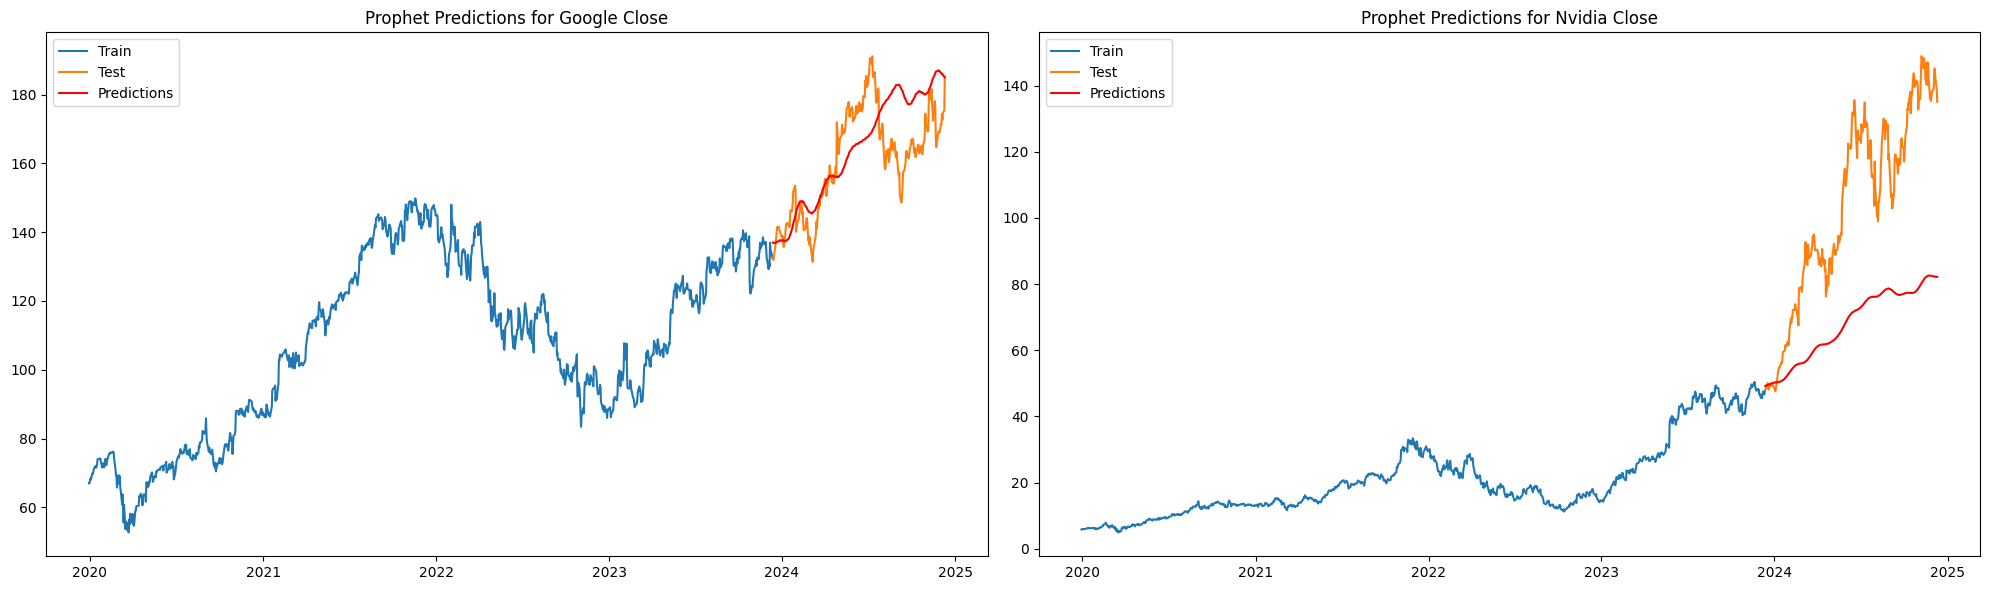

In [267]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Google Close
target_google = 'Google Close'
features_google = ['Nvidia Close', '50_d_avg', '^GSPC']

# Préparation des données pour Prophet (Google)
data_google = google_data.reset_index()[['Date', target_google]]
data_google.columns = ['ds', 'y']  # Renommer les colonnes selon les exigences de Prophet

# Séparer les données en train et test
train_size_google = int(len(data_google) * 0.8)
train_google = data_google.iloc[:train_size_google]
test_google = data_google.iloc[train_size_google:]

# Initialiser et entraîner le modèle
model_google = Prophet()
model_google.fit(train_google)

# Faire des prédictions
future_google = model_google.make_future_dataframe(periods=(test_google['ds'].max() - train_google['ds'].max()).days + 1, freq='D')
forecast_google = model_google.predict(future_google)

# Extraire les prédictions
predictions_google = forecast_google[forecast_google['ds'].isin(test_google['ds'])][['ds', 'yhat']]

# Évaluer les performances
mse_google = mean_squared_error(test_google['y'], predictions_google['yhat'])
rmse_google = np.sqrt(mse_google)
mae_google = mean_absolute_error(test_google['y'], predictions_google['yhat'])
r2_google = r2_score(test_google['y'], predictions_google['yhat'])
mape_google = np.mean(np.abs((test_google['y'] - predictions_google['yhat']) / test_google['y'])) * 100
accuracy_google = 100 - mape_google

print(f"Evaluation Metrics for Google Close:")
print(f"Mean Squared Error (MSE): {mse_google:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_google:.4f}")
print(f"Mean Absolute Error (MAE): {mae_google:.4f}")
print(f"R-squared (R²): {r2_google:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_google:.2f}%")
print(f"Accuracy: {accuracy_google:.2f}%")

# Nvidia Close
target_nvidia = 'Nvidia Close'
features_nvidia = ['Google Close', '50_d_avg', '^GSPC']

# Préparation des données pour Prophet (Nvidia)
data_nvidia = nvidia_data.reset_index()[['Date', target_nvidia]]
data_nvidia.columns = ['ds', 'y']  # Renommer les colonnes selon les exigences de Prophet

# Séparer les données en train et test
train_size_nvidia = int(len(data_nvidia) * 0.8)
train_nvidia = data_nvidia.iloc[:train_size_nvidia]
test_nvidia = data_nvidia.iloc[train_size_nvidia:]

# Initialiser et entraîner le modèle
model_nvidia = Prophet()
model_nvidia.fit(train_nvidia)

# Faire des prédictions
future_nvidia = model_nvidia.make_future_dataframe(periods=(test_nvidia['ds'].max() - train_nvidia['ds'].max()).days + 1, freq='D')
forecast_nvidia = model_nvidia.predict(future_nvidia)

# Extraire les prédictions
predictions_nvidia = forecast_nvidia[forecast_nvidia['ds'].isin(test_nvidia['ds'])][['ds', 'yhat']]

# Évaluer les performances
mse_nvidia = mean_squared_error(test_nvidia['y'], predictions_nvidia['yhat'])
rmse_nvidia = np.sqrt(mse_nvidia)
mae_nvidia = mean_absolute_error(test_nvidia['y'], predictions_nvidia['yhat'])
r2_nvidia = r2_score(test_nvidia['y'], predictions_nvidia['yhat'])
mape_nvidia = np.mean(np.abs((test_nvidia['y'] - predictions_nvidia['yhat']) / test_nvidia['y'])) * 100
accuracy_nvidia = 100 - mape_nvidia

print(f"Evaluation Metrics for Nvidia Close:")
print(f"Mean Squared Error (MSE): {mse_nvidia:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_nvidia:.4f}")
print(f"Mean Absolute Error (MAE): {mae_nvidia:.4f}")
print(f"R-squared (R²): {r2_nvidia:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_nvidia:.2f}%")
print(f"Accuracy: {accuracy_nvidia:.2f}%")

# Visualisation des résultats côte à côte
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Graphique pour Google Close
axs[0].plot(train_google['ds'], train_google['y'], label='Train')
axs[0].plot(test_google['ds'], test_google['y'], label='Test')
axs[0].plot(predictions_google['ds'], predictions_google['yhat'], color='red', label='Predictions')
axs[0].legend()
axs[0].set_title("Prophet Predictions for Google Close")

# Graphique pour Nvidia Close
axs[1].plot(train_nvidia['ds'], train_nvidia['y'], label='Train')
axs[1].plot(test_nvidia['ds'], test_nvidia['y'], label='Test')
axs[1].plot(predictions_nvidia['ds'], predictions_nvidia['yhat'], color='red', label='Predictions')
axs[1].legend()
axs[1].set_title("Prophet Predictions for Nvidia Close")

plt.tight_layout()
plt.show()


**The addition of the exogenous variable greatly improves our predictions with the Prophet model.**

## **<font color='darkred'>Adding the NASDAQ index</font>**

The NASDAQ index is known today as a reference in the American technological world. As Google and Nvidia are both American and in the NASDAQ index, it will be a lot correlated with our data and then help us doing predictions.

In [268]:
#Download S&P data from Yahoo Finance
nasdaq_data = yf.download("^IXIC", start="2019-12-13", end="2024-12-11")[['Close']]
nasdaq_data.rename(columns={'Close': 'NASDAQ'}, inplace=True)

# Checking if our column is multiindex or not
if isinstance(nasdaq_data.columns, pd.MultiIndex):
    nasdaq_data.columns = nasdaq_data.columns.droplevel(0)  # Delete the first level of the multiindex

# Merge S&P 500 data with Google and Nvidia data (only if SP500 column is not already present)
if '^IXIC' not in google_data.columns:
    google_data = pd.merge(nasdaq_data, google_data, left_index=True, right_index=True, how='inner')

if '^IXIC' not in nvidia_data.columns:
    nvidia_data = pd.merge(nasdaq_data, nvidia_data, left_index=True, right_index=True, how='inner')

# Display the first rows of the merged datasets
#print(google_data.head())
#print(nvidia_data.head())

[*********************100%***********************]  1 of 1 completed


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1iz4uxzh/v8_r4nl6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1iz4uxzh/v9o8iy6g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14732', 'data', 'file=/tmp/tmp1iz4uxzh/v8_r4nl6.json', 'init=/tmp/tmp1iz4uxzh/v9o8iy6g.json', 'output', 'file=/tmp/tmp1iz4uxzh/prophet_model4so09pym/prophet_model-20241226175411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:54:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:54:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1i

Evaluation Metrics for Google Close:
Mean Squared Error (MSE): 151.5661
Root Mean Squared Error (RMSE): 12.3112
Mean Absolute Error (MAE): 10.2087
R-squared (R²): 0.2977
Mean Absolute Percentage Error (MAPE): 6.16%
Accuracy: 93.84%


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1iz4uxzh/h9d277tb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95874', 'data', 'file=/tmp/tmp1iz4uxzh/5g0o6b5q.json', 'init=/tmp/tmp1iz4uxzh/h9d277tb.json', 'output', 'file=/tmp/tmp1iz4uxzh/prophet_modelq0tad3bp/prophet_model-20241226175412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:54:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:54:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Evaluation Metrics for Nvidia Close:
Mean Squared Error (MSE): 1630.4542
Root Mean Squared Error (RMSE): 40.3789
Mean Absolute Error (MAE): 35.7422
R-squared (R²): -0.9577
Mean Absolute Percentage Error (MAPE): 36.74%
Accuracy: 63.26%


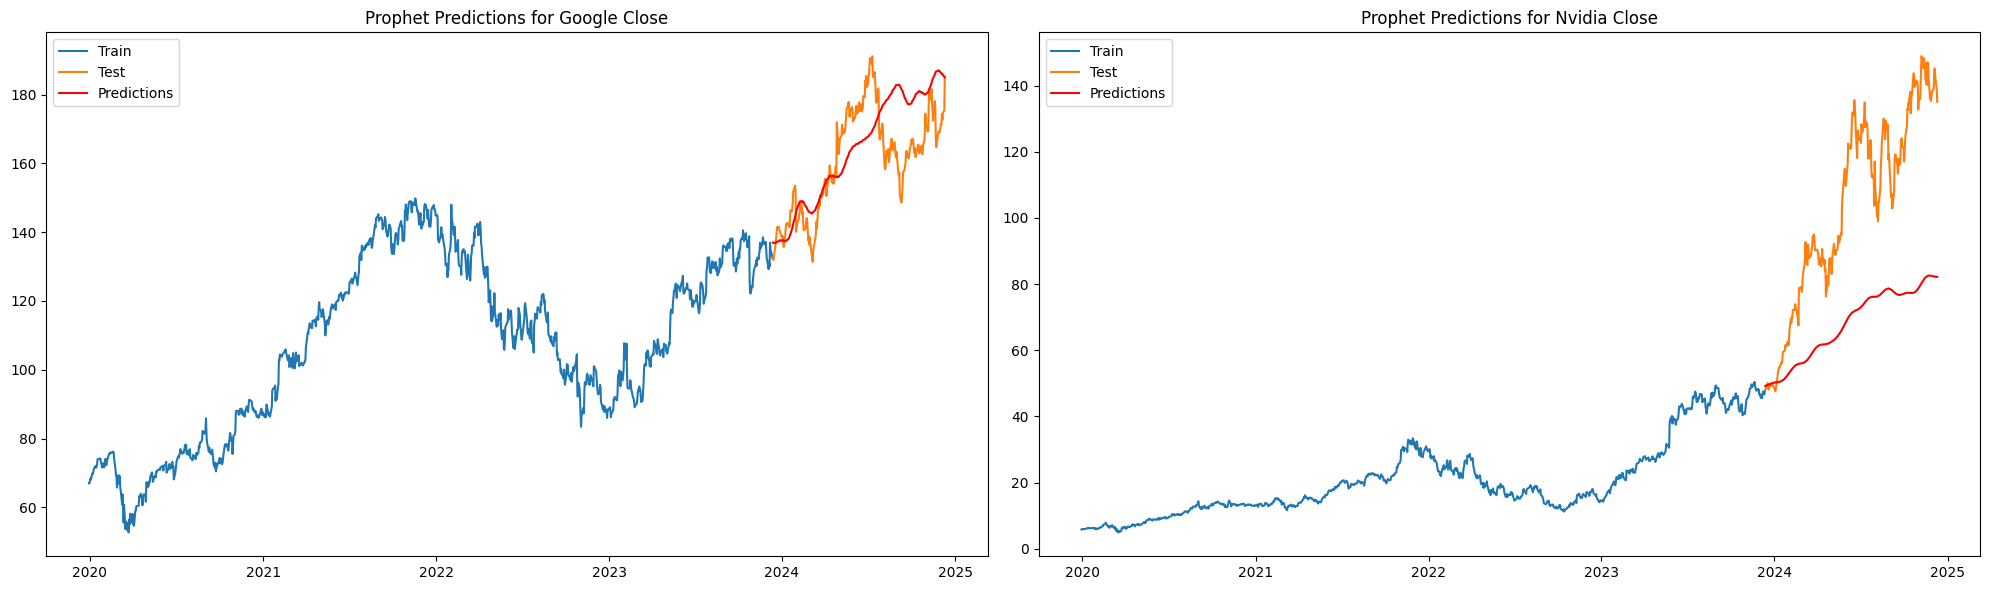

In [246]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Google Close
target_google = 'Google Close'
features_google = ['Nvidia Close', '50_d_avg', '^IXIC']

# Préparation des données pour Prophet (Google)
data_google = google_data.reset_index()[['Date', target_google]]
data_google.columns = ['ds', 'y']  # Renommer les colonnes selon les exigences de Prophet

# Séparer les données en train et test
train_size_google = int(len(data_google) * 0.8)
train_google = data_google.iloc[:train_size_google]
test_google = data_google.iloc[train_size_google:]

# Initialiser et entraîner le modèle
model_google = Prophet()
model_google.fit(train_google)

# Faire des prédictions
future_google = model_google.make_future_dataframe(periods=(test_google['ds'].max() - train_google['ds'].max()).days + 1, freq='D')
forecast_google = model_google.predict(future_google)

# Extraire les prédictions
predictions_google = forecast_google[forecast_google['ds'].isin(test_google['ds'])][['ds', 'yhat']]

# Évaluer les performances
mse_google = mean_squared_error(test_google['y'], predictions_google['yhat'])
rmse_google = np.sqrt(mse_google)
mae_google = mean_absolute_error(test_google['y'], predictions_google['yhat'])
r2_google = r2_score(test_google['y'], predictions_google['yhat'])
mape_google = np.mean(np.abs((test_google['y'] - predictions_google['yhat']) / test_google['y'])) * 100
accuracy_google = 100 - mape_google

print(f"Evaluation Metrics for Google Close:")
print(f"Mean Squared Error (MSE): {mse_google:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_google:.4f}")
print(f"Mean Absolute Error (MAE): {mae_google:.4f}")
print(f"R-squared (R²): {r2_google:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_google:.2f}%")
print(f"Accuracy: {accuracy_google:.2f}%")

# Nvidia Close
target_nvidia = 'Nvidia Close'
features_nvidia = ['Google Close', '50_d_avg', '^IXIC']

# Préparation des données pour Prophet (Nvidia)
data_nvidia = nvidia_data.reset_index()[['Date', target_nvidia]]
data_nvidia.columns = ['ds', 'y']  # Renommer les colonnes selon les exigences de Prophet

# Séparer les données en train et test
train_size_nvidia = int(len(data_nvidia) * 0.8)
train_nvidia = data_nvidia.iloc[:train_size_nvidia]
test_nvidia = data_nvidia.iloc[train_size_nvidia:]

# Initialiser et entraîner le modèle
model_nvidia = Prophet()
model_nvidia.fit(train_nvidia)

# Faire des prédictions
future_nvidia = model_nvidia.make_future_dataframe(periods=(test_nvidia['ds'].max() - train_nvidia['ds'].max()).days + 1, freq='D')
forecast_nvidia = model_nvidia.predict(future_nvidia)

# Extraire les prédictions
predictions_nvidia = forecast_nvidia[forecast_nvidia['ds'].isin(test_nvidia['ds'])][['ds', 'yhat']]

# Évaluer les performances
mse_nvidia = mean_squared_error(test_nvidia['y'], predictions_nvidia['yhat'])
rmse_nvidia = np.sqrt(mse_nvidia)
mae_nvidia = mean_absolute_error(test_nvidia['y'], predictions_nvidia['yhat'])
r2_nvidia = r2_score(test_nvidia['y'], predictions_nvidia['yhat'])
mape_nvidia = np.mean(np.abs((test_nvidia['y'] - predictions_nvidia['yhat']) / test_nvidia['y'])) * 100
accuracy_nvidia = 100 - mape_nvidia

print(f"Evaluation Metrics for Nvidia Close:")
print(f"Mean Squared Error (MSE): {mse_nvidia:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_nvidia:.4f}")
print(f"Mean Absolute Error (MAE): {mae_nvidia:.4f}")
print(f"R-squared (R²): {r2_nvidia:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_nvidia:.2f}%")
print(f"Accuracy: {accuracy_nvidia:.2f}%")

# Visualisation des résultats côte à côte
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Graphique pour Google Close
axs[0].plot(train_google['ds'], train_google['y'], label='Train')
axs[0].plot(test_google['ds'], test_google['y'], label='Test')
axs[0].plot(predictions_google['ds'], predictions_google['yhat'], color='red', label='Predictions')
axs[0].legend()
axs[0].set_title("Prophet Predictions for Google Close")

# Graphique pour Nvidia Close
axs[1].plot(train_nvidia['ds'], train_nvidia['y'], label='Train')
axs[1].plot(test_nvidia['ds'], test_nvidia['y'], label='Test')
axs[1].plot(predictions_nvidia['ds'], predictions_nvidia['yhat'], color='red', label='Predictions')
axs[1].legend()
axs[1].set_title("Prophet Predictions for Nvidia Close")

plt.tight_layout()
plt.show()


**The addition of the exogenous variable greatly improves our predictions with the Prophet model.**

## **<font color='darkred'>Adding the XLK index for Google</font>**

In [263]:
xlk_data = yf.download("XLK", start="2019-12-13", end="2024-12-11")[['Close']]
xlk_data.rename(columns={'Close': 'XLK'}, inplace=True)

# Checking if our column is multiindex or not
if isinstance(xlk_data.columns, pd.MultiIndex):
    xlk_data.columns = xlk_data.columns.droplevel(0)  # Delete the first level of the multiindex

# Merge XLK data with Google data
if 'XLK' not in google_data.columns:
    google_data = pd.merge(xlk_data, google_data, left_index=True, right_index=True, how='inner')

# Display the first rows of the merged datasets
#print(google_data.head())

[*********************100%***********************]  1 of 1 completed


## **<font color='darkred'>Adding the SOXX index for Nvidia</font>**

In [264]:
soxx_data = yf.download("SOXX", start="2019-12-13", end="2024-12-11")[['Close']]
soxx_data.rename(columns={'Close': 'SOXX'}, inplace=True)

# Checking if our column is multiindex or not
if isinstance(soxx_data.columns, pd.MultiIndex):
    soxx_data.columns = soxx_data.columns.droplevel(0)  # Delete the first level of the multiindex

# Merge SOXX data with Nvidia data
if 'SOXX' not in nvidia_data.columns:
    nvidia_data = pd.merge(soxx_data, nvidia_data, left_index=True, right_index=True, how='inner')

# Display the first rows of the merged datasets
#print(nvidia_data.head())

[*********************100%***********************]  1 of 1 completed


## **<font color='darkred'>Adding the Interest rates index for both</font>**

In [265]:
interest_rate_data = yf.download("^TNX", start="2019-12-13", end="2024-12-11")[['Close']]
interest_rate_data.rename(columns={'Close': 'Interest Rate'}, inplace=True)

# Checking if our column is multiindex or not
if isinstance(interest_rate_data.columns, pd.MultiIndex):
    interest_rate_data.columns = interest_rate_data.columns.droplevel(0)  # Delete the first level of the multiindex

# Merge S&P 500 data with Google and Nvidia data (only if SP500 column is not already present)
if '^TNX' not in google_data.columns:
    google_data = pd.merge(interest_rate_data, google_data, left_index=True, right_index=True, how='inner')

if '^TNX' not in nvidia_data.columns:
    nvidia_data = pd.merge(interest_rate_data, nvidia_data, left_index=True, right_index=True, how='inner')

# Display the first rows of the merged datasets
#print(google_data.head())
#print(nvidia_data.head())

[*********************100%***********************]  1 of 1 completed


# <font color='#FF8C00'>**5. PREDICTION ON 5 YEARS USING OUR MODEL**</font>

We have settle the fact that we will use Prophet for our predictions since it has the best predictions. We will use all the exogenous variables added previously because this will increase the efficiency of our model.

#### **Predictions**

<ipython-input-262-8289801acbe8>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].fillna(method='ffill', inplace=True)
<ipython-input-262-8289801acbe8>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[feature].fillna(method='ffill', inplace=True)
<ipython-input-262-8289801acbe8>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavio

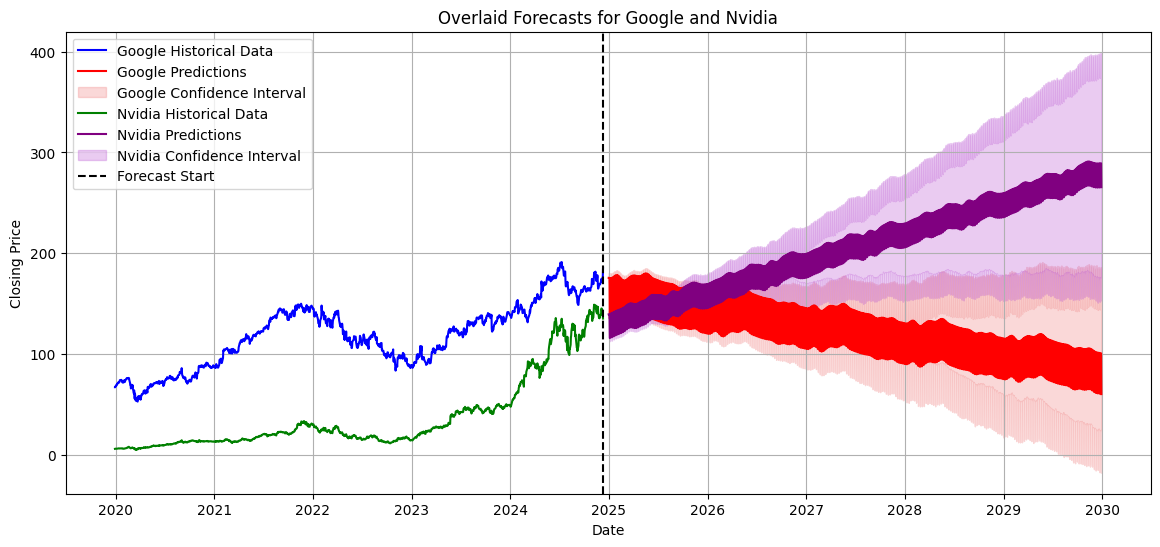

In [262]:
target = 'Google Close'
exog_features = ['Nvidia Close', '50_d_avg', '^IXIC', 'XLK', '^GSPC', '^TNX']  # Variables explicatives
data = google_data.reset_index()[['Date', target] + exog_features]  # Inclure les variables explicatives
data.columns = ['ds', 'y'] + exog_features  # Renommer les colonnes pour Prophet

# Remplir les valeurs manquantes dans les variables explicatives
for feature in exog_features:
    data[feature].fillna(method='ffill', inplace=True)
    data[feature].fillna(method='bfill', inplace=True)

# Initialiser et configurer le modèle Prophet
model = Prophet()

# Ajouter les variables explicatives au modèle
for feature in exog_features:
    model.add_regressor(feature)

# Entraîner le modèle avec les données historiques
model.fit(data)

# Créer un DataFrame pour les 5 prochaines années (365 * 5 jours)
future = model.make_future_dataframe(periods=365 * 5, freq='D', include_history=False)

# Assurez-vous que le début des prédictions commence avant 2025
future['ds'] = pd.date_range(start='2024-12-31', periods=365 * 5, freq='D')

# Ajouter les valeurs des variables explicatives au DataFrame future
# Pour prédire, nous conservons les dernières valeurs des variables explicatives (hypothèse simple)
last_known_values = data[exog_features].iloc[-1].to_dict()
for feature in exog_features:
    future[feature] = last_known_values[feature]

# Faire des prédictions
forecast_google = model.predict(future)


# Préparation des données pour Prophet
target = 'Nvidia Close'  # Changement pour Nvidia
exog_features = ['Google Close', '50_d_avg', '^IXIC', 'SOXX', '^GSPC', '^TNX']  # XLK remplacé par SOXX
data = nvidia_data.reset_index()[['Date', target] + exog_features]
data.columns = ['ds', 'y'] + exog_features

# Remplir les valeurs manquantes dans les variables explicatives
for feature in exog_features:
    data[feature].fillna(method='ffill', inplace=True)
    data[feature].fillna(method='bfill', inplace=True)

# Initialiser et configurer le modèle Prophet
model = Prophet()

# Ajouter les variables explicatives au modèle
for feature in exog_features:
    model.add_regressor(feature)

# Entraîner le modèle avec les données historiques
model.fit(data)

# Créer un DataFrame pour les 5 prochaines années
future = model.make_future_dataframe(periods=365 * 5, freq='D', include_history=False)

# Assurez-vous que le début des prédictions commence avant 2025 (fin 2024)
future['ds'] = pd.date_range(start='2024-12-31', periods=365 * 5, freq='D')

# Ajouter les valeurs des variables explicatives au DataFrame future
# On utilise la dernière valeur connue pour les prévisions (approche simpliste)
last_known_values = data[exog_features].iloc[-1].to_dict()
for feature in exog_features:
    future[feature] = last_known_values[feature]

# Faire des prédictions
forecast_nvidia = model.predict(future)

# Affichage des graphiques superposés
plt.figure(figsize=(14, 6))  # Taille de la figure unique

# Graphique pour Google (en premier plan)
plt.plot(data_google['ds'], data_google['y'], label='Google Historical Data', color='blue')
plt.plot(forecast_google['ds'], forecast_google['yhat'], label='Google Predictions', color='red')
plt.fill_between(forecast_google['ds'], forecast_google['yhat_lower'], forecast_google['yhat_upper'], color='lightcoral', alpha=0.3, label='Google Confidence Interval')

plt.plot(data_nvidia['ds'], data_nvidia['y'], label='Nvidia Historical Data', color='green')
plt.plot(forecast_nvidia['ds'], forecast_nvidia['yhat'], label='Nvidia Predictions', color='purple')
plt.fill_between(forecast_nvidia['ds'], forecast_nvidia['yhat_lower'], forecast_nvidia['yhat_upper'], color='mediumorchid', alpha=0.3, label='Nvidia Confidence Interval')

plt.axvline(x=data_google['ds'].max(), color='black', linestyle='--', label='Forecast Start')

plt.title("Overlaid Forecasts for Google and Nvidia")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()

# **<font color='darkred'>Results of our projection </font>**

#### **Interpretation and answer to our problem**

---



The chart compares Google and Nvidia stock price forecasts through 2030, using historical data and the Prophet model. Forecasts show a strong upward trend for Nvidia, contrasting with a slight decline for Google. Therefore, <font color='red'>**according to this model, Nvidia is much more likely to achieve the 20% return** </font> target than Google.

#### **Limitations of the model**

---




*   **Continuity Assumption**: The Prophet model, like many time series forecasting models, assumes that past trends will continue into the future. However, financial markets are influenced by many factors (economic, political, technological events, etc.) which can change suddenly and make forecasts obsolete. For example, a major innovation, economic crisis or regulatory change could radically affect stock prices.
* **Simplification of exogenous variables**: The model uses exogenous variables (such as stock market indices). However, it uses the last known values ​​of these variables for future forecasting. This is an important simplification, because these variables will also evolve. Not taking their future development into account adds a source of uncertainty.
*   **Long-term increasing uncertainty**: As seen in the graph, confidence intervals widen significantly over time. This is normal because the longer the forecast horizon, the greater the uncertainty. 5-year forecasts, such as those presented here, should be interpreted with great caution.